<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#loading the csv data in a python dictionary
from collections import defaultdict
import csv

data_dict = defaultdict(list)
with open('sat_scores.csv', 'r') as f:
    reader = csv.DictReader(f)
           
    for row in reader:
        for (k,v) in row.items():
             data_dict[k].append(v)

print (data_dict)

defaultdict(<class 'list'>, {'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
#creating pandas dataframe from the python dictionary:
raw_data = pd.DataFrame(data_dict)
raw_data.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [4]:
#loading & creating pandas dataframe using read_csv:
raw_data1 = pd.read_csv('sat_scores.csv')

In [5]:
raw_data1.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [6]:
raw_data1.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [293]:
raw_data1.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [7]:
raw_data1.shape

(52, 4)

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
raw_data1.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

In [ ]:
##The data describes the Verbal and Math score of students across states in United States Of America. Also 'Rate' column gives the participation percentage.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [295]:
raw_data1.shape

(52, 4)

In [12]:
name = ['State', 'Rate', 'Verbal', 'Math']
name_type = ['Object', 'int64', 'int64', 'int64']
description = ['Sate names', 'Participation percentage', 'Score in Verbal', 'Score in Math']
shapes_name = [(52,4)]
data_dict_info = {'column_name': name, 'column_type': name_type, 'description': description, 'shape': shapes_name}


In [13]:
data_dict_info

{'column_name': ['State', 'Rate', 'Verbal', 'Math'],
 'column_type': ['Object', 'int64', 'int64', 'int64'],
 'description': ['Sate names',
  'Participation percentage',
  'Score in Verbal',
  'Score in Math'],
 'shape': [(52, 4)]}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

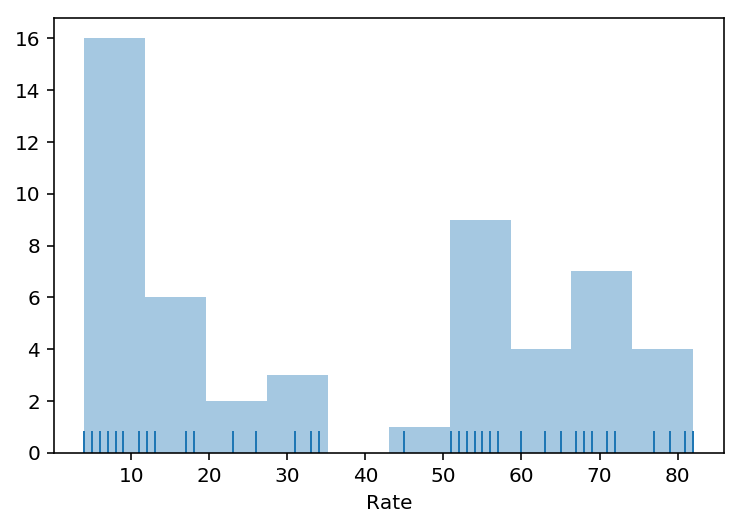

In [14]:
fig, ax = figsize = (8,6)
sns.distplot(raw_data1['Rate'], rug = True, kde = False, bins = 10)


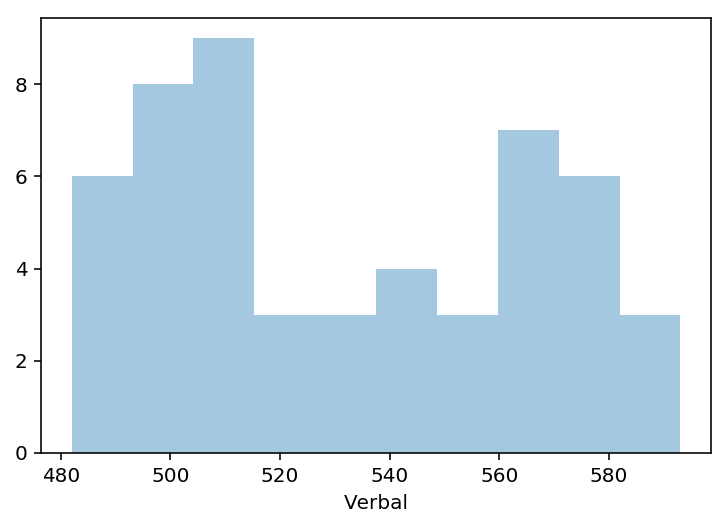

In [15]:
sns.distplot(raw_data1.Verbal, kde = False, bins = 10)

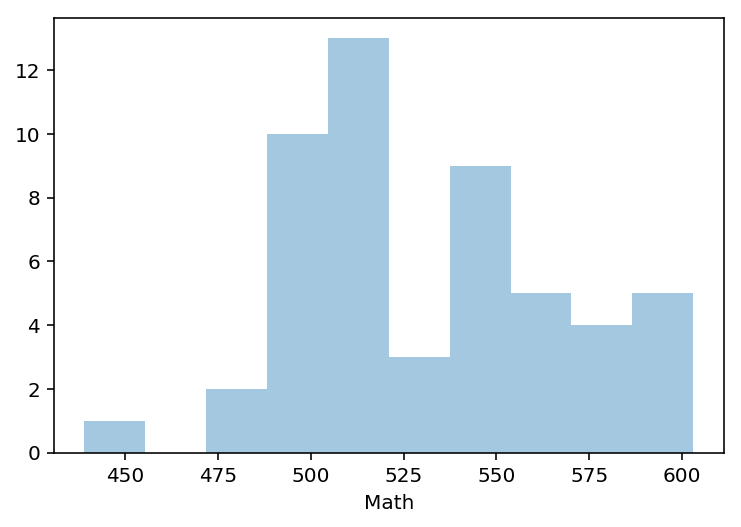

In [17]:
sns.distplot(raw_data1.Math, kde= False, bins = 10)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

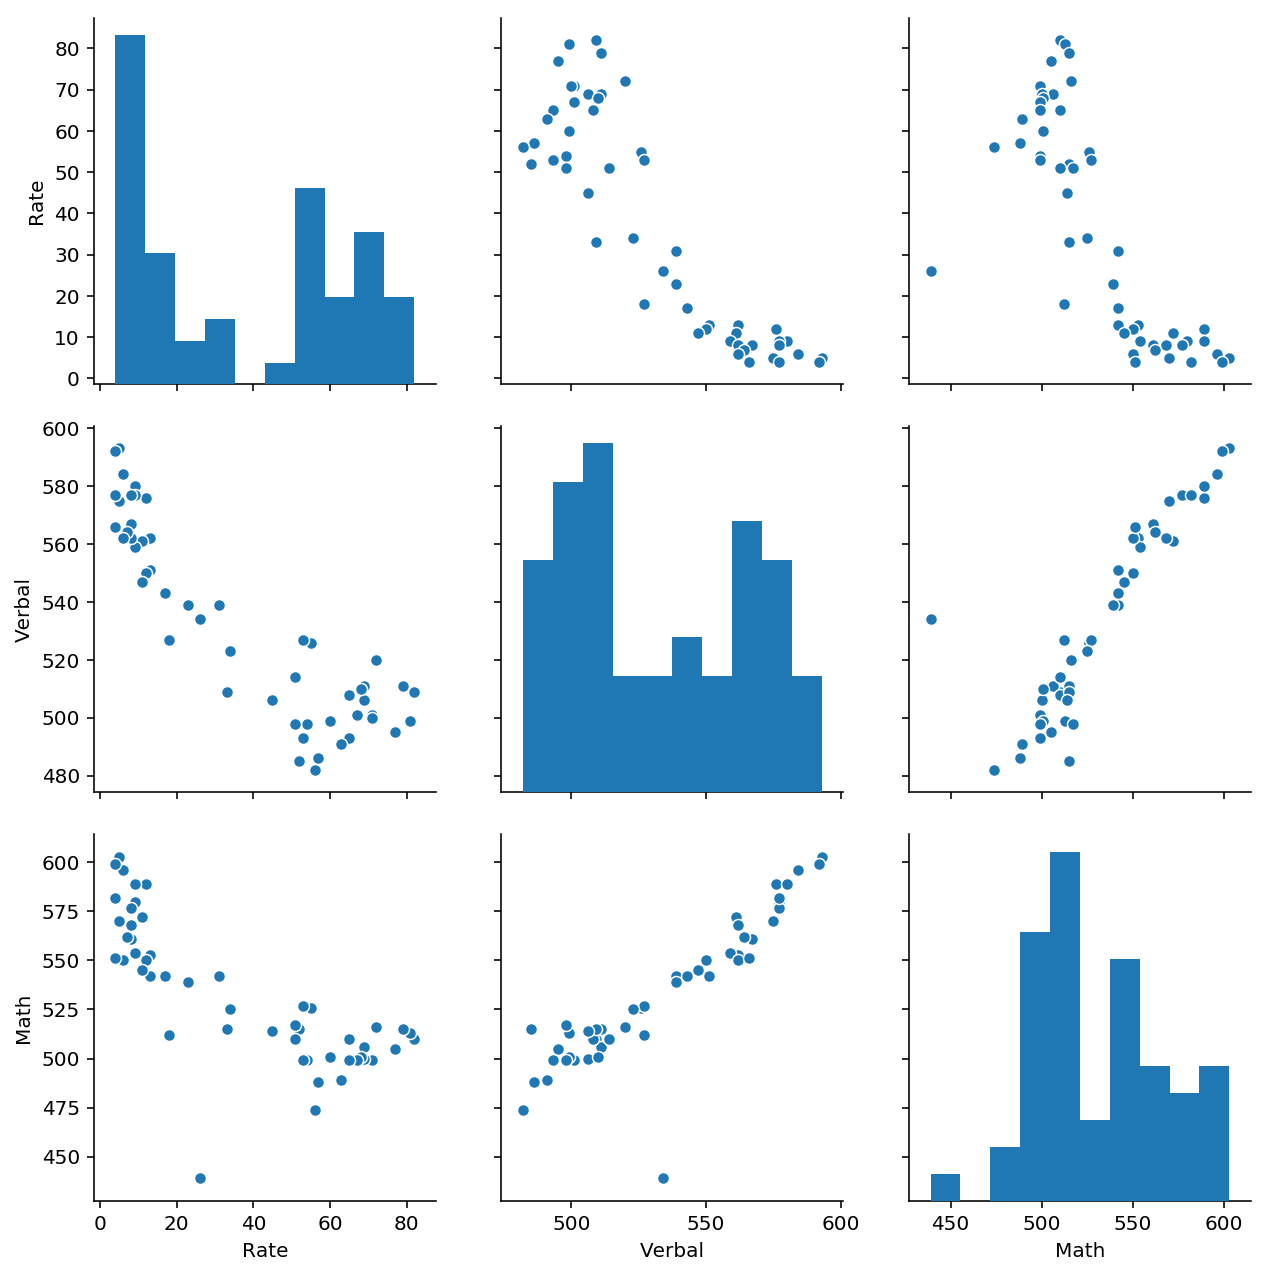

In [18]:
sns.pairplot(raw_data1, height = 3)

### Inference
#### Rate Vs Verbal plot shows  - higher the Verbal scores there is less Rate of students and vice versa (Negative linear relationship)
#### Rate Vs Math also shows negative linear relation - Higher the math score the rate of distrbution is less
#### Verbal Vs Math or Math Vs Verbal - the plot shows positive linear relationship i.e Higher the Verbal Score, higher the math score as well and vice- versa.

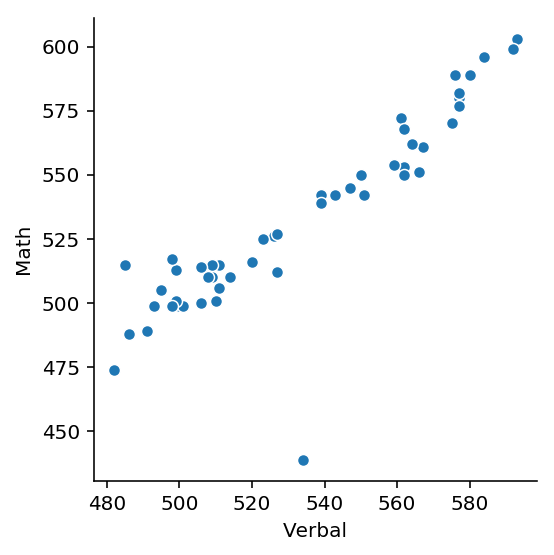

In [43]:
sns.pairplot(data = raw_data1, x_vars = 'Verbal', y_vars = 'Math', height = 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

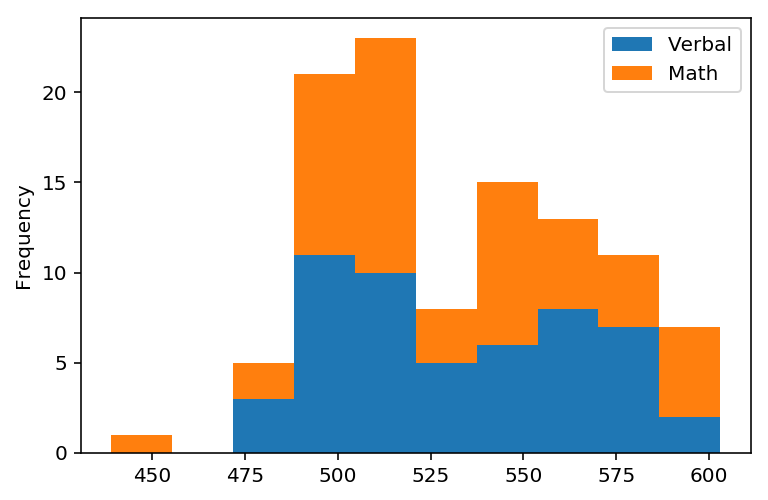

In [19]:
raw_data2 = raw_data1[['Verbal', 'Math']]
#raw_data2
raw_data2.plot.hist(stacked = True, bins = 10)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

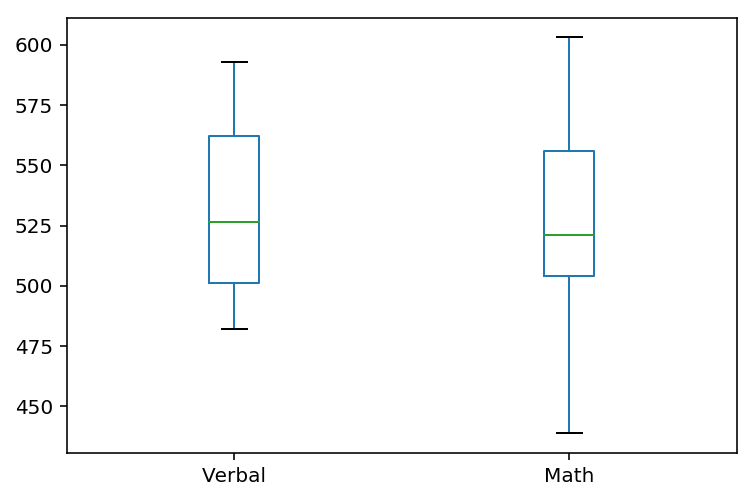

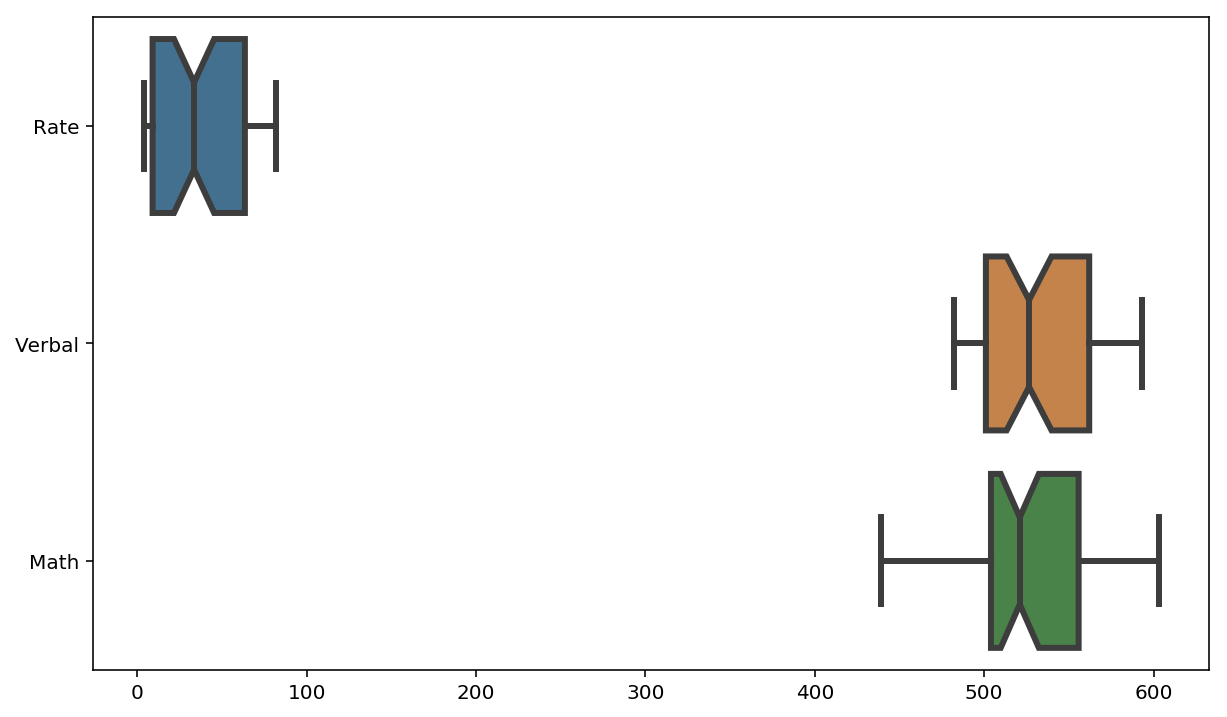

In [20]:
# boxplot - Math and Verbal
raw_data2.plot.box()
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()

# Boxplot on same chart - Rate, Verbal and Math
ax = sns.boxplot(data=raw_data1[['Rate', 'Verbal','Math']], orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()
#raw_data1.plot.box()

Both Math and Verbal has values between 400 - 700 so they can be plotted in same chart.
Since Rate has percentage value or range between 0 -100, it does not fit in the same chart with Verbal and Math.

#### Answer: Boxplot helps in identifying outliers, also shows the min, max and median values (the percentiles . Scatterplot and histogram 
#### shows relationship between two variables and distribution of each variable respectively.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [22]:
# In order to plot all the variables Math, Verbal and rate in single chart, let's standardise the variables with mean 0 and standard deviation 1
raw_data1_stand = (raw_data1[['Verbal', 'Math', 'Rate']] - raw_data1[['Verbal', 'Math', 'Rate']].mean()) / raw_data1[['Verbal', 'Math', 'Rate']].std()

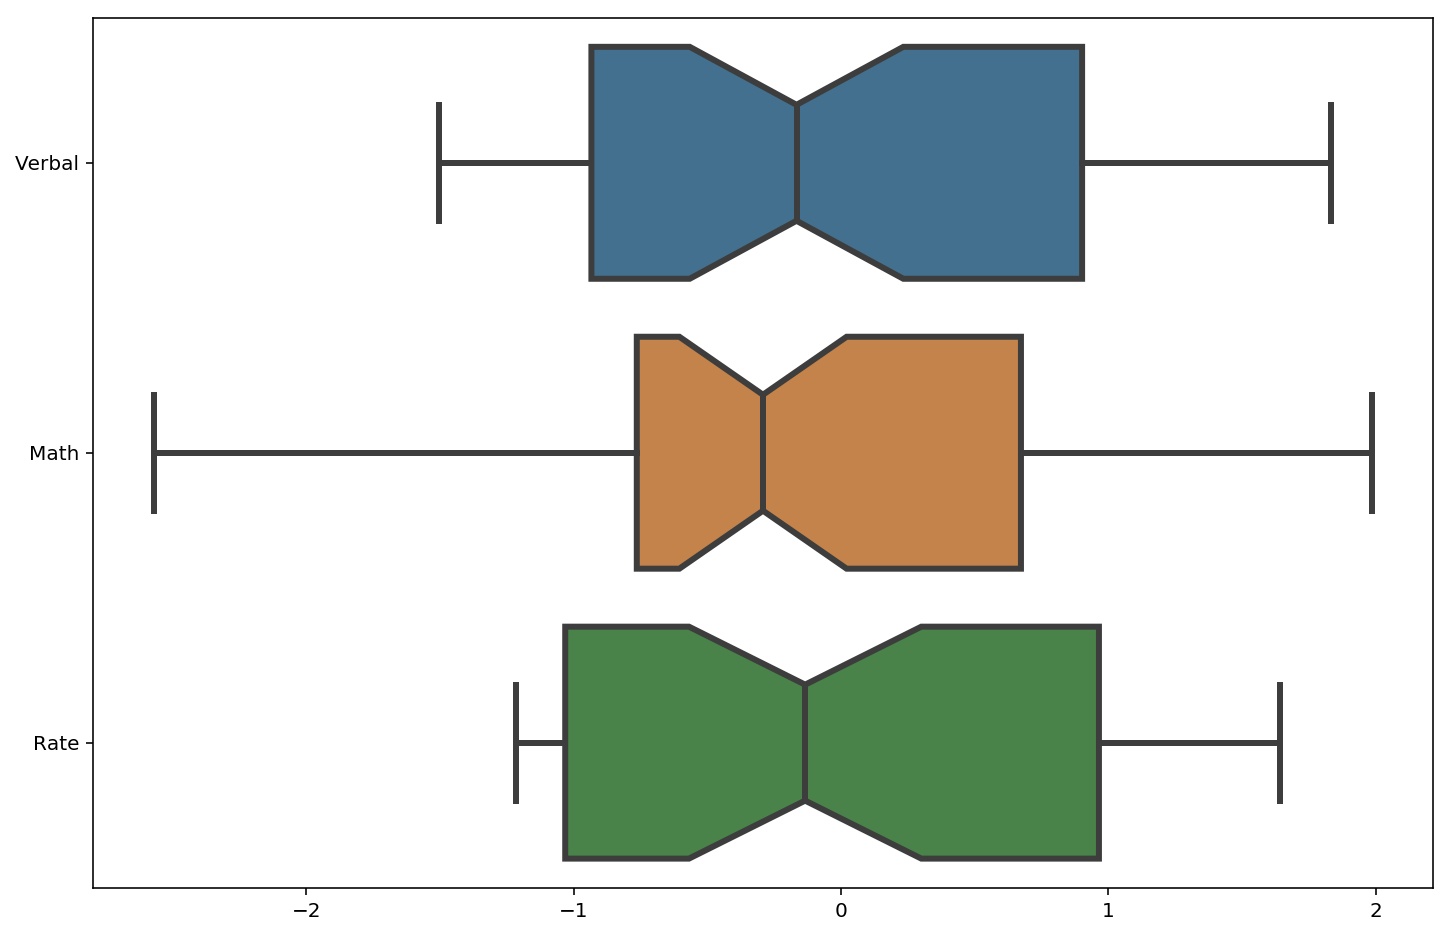

In [23]:
# Now plotting the standardised data of all 3 variables and doing a boxplot in same chart
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

ax = sns.boxplot(data=raw_data1_stand, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [27]:
# mean of verbal score
raw_data1.Verbal.mean()


532.0192307692307

In [28]:
raw_data1.Verbal.describe()

count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

In [29]:
# finding the list of states whose score is above average in Verbal:
list_avg_v = raw_data1[['State','Verbal']][raw_data1.Verbal > raw_data1.Verbal.mean()]
print(list_avg_v.count())
list_avg_v

State     24
Verbal    24
dtype: int64


State  Verbal
26    CO     539
27    OH     534
28    MT     539
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566

In [182]:
# 24 states have more than avergae Verbal Scores which shows that it is almost normally distributed.

# 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [31]:
med_verbal = sorted(raw_data1['Verbal'])
med_verbal = np.median(med_verbal)
med_verbal

526.5

In [32]:
list_med_v = raw_data1[['State', 'Verbal']][raw_data1.Verbal > med_verbal]
list_med_v.count()

State     26
Verbal    26
dtype: int64

In [183]:
# 26 states have more than the median score as the median value is less than the mean value and skewness to the right.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [34]:
raw_data1['diff_verb_math'] = raw_data1['Verbal'] - raw_data1['Math']

In [35]:
raw_data1.head()

State  Rate  Verbal  Math  diff_verb_math
0    CT    82     509   510              -1
1    NJ    81     499   513             -14
2    MA    79     511   515              -4
3    NY    77     495   505             -10
4    NH    72     520   516               4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [55]:
# Sorting the Top 10 higher Verbal scores than Math
top_verbal = raw_data1.diff_verb_math.nlargest(n=10)
top_verbal

27    95
29    15
50    15
45    12
9      9
31     9
32     9
16     8
8      6
41     6
Name: diff_verb_math, dtype: int64

In [56]:
#Creating a dataframe with top 10 Verbal scores
n = top_verbal.index
top_verbal_df = pd.DataFrame(raw_data1.loc[n])
top_verbal_df


State  Rate  Verbal  Math  diff_verb_math
27    OH    26     534   439              95
29    WV    18     527   512              15
50    MS     4     566   551              15
45    AR     6     562   550              12
9     VA    68     510   501               9
31    TN    13     562   553               9
32    NM    13     551   542               9
16    DC    56     482   474               8
8     ME    69     506   500               6
41    OK     8     567   561               6

In [57]:
top_verbal_df['Rank'] = [1,2,3,4,5,6,7,8,9,10]

In [58]:
top_verbal_df

State  Rate  Verbal  Math  diff_verb_math  Rank
27    OH    26     534   439              95     1
29    WV    18     527   512              15     2
50    MS     4     566   551              15     3
45    AR     6     562   550              12     4
9     VA    68     510   501               9     5
31    TN    13     562   553               9     6
32    NM    13     551   542               9     7
16    DC    56     482   474               8     8
8     ME    69     506   500               6     9
41    OK     8     567   561               6    10

In [40]:
# Sorting the top 10 Math high scores than Verbal
top_math = raw_data1.diff_verb_math.nsmallest(10)
top_math 

21   -30
23   -19
1    -14
33   -13
44   -12
36   -11
3    -10
47   -10
37    -9
51    -8
Name: diff_verb_math, dtype: int64

In [50]:
# Creating a dataframe of top 10 Math scores which are higher than verbal scores
nm = top_math.index
top_math_df = pd.DataFrame(raw_data1.loc[nm])
top_math_df['diff_verb_math'] = abs(top_math_df.diff_verb_math)

In [51]:
top_math_df['Rank'] = [1,2,3,4,5,6,7,8,9,10]

In [52]:
top_math_df

State  Rate  Verbal  Math  diff_verb_math  Rank
21    HI    52     485   515              30     1
23    CA    51     498   517              19     2
1     NJ    81     499   513              14     3
33    IL    12     576   589              13     4
44    WI     6     584   596              12     5
36    MI    11     561   572              11     6
3     NY    77     495   505              10     7
47    IA     5     593   603              10     8
37    MN     9     580   589               9     9
51   All    45     506   514               8    10

In [54]:
#top 3 Verbal Rank States
top_verbal_df[['State', 'Verbal', 'Rank']].head(3)

State  Verbal  Rank
27    OH     534     1
29    WV     527     2
50    MS     566     3

In [59]:
# top 3 Math Rank States
top_math_df.head(3)

State  Rate  Verbal  Math  diff_verb_math  Rank
21    HI    52     485   515              30     1
23    CA    51     498   517              19     2
1     NJ    81     499   513              14     3

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [60]:
raw_data1[['Verbal', 'Math', 'Rate']].corr()
#The scores of Verbal and Math are highly  coorelated as the valuess are close to 1.

Verbal      Math      Rate
Verbal  1.000000  0.899871 -0.886432
Math    0.899871  1.000000 -0.773746
Rate   -0.886432 -0.773746  1.000000

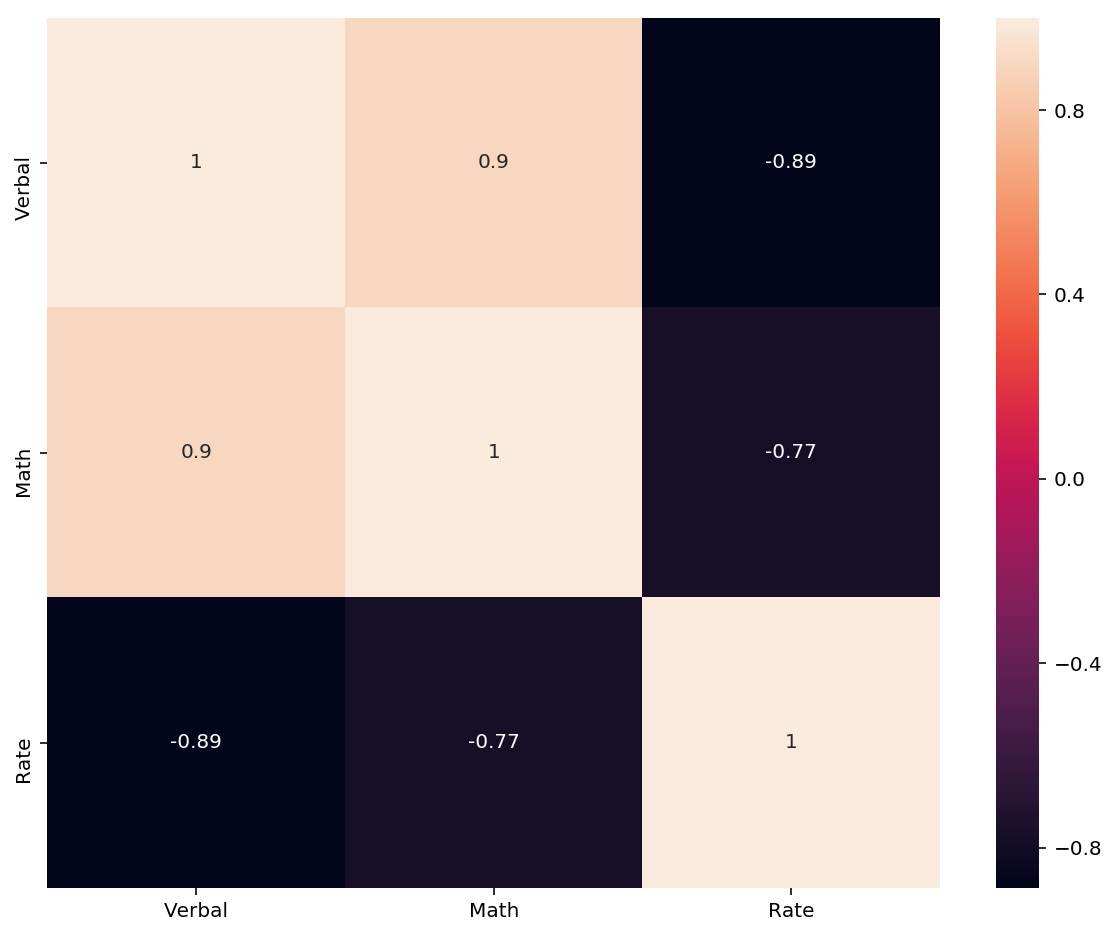

In [61]:
plt.figure(figsize = (10,8))
sns.heatmap(raw_data1[['Verbal', 'Math', 'Rate']].corr(), robust = True, annot = True)

## Verbal & Math scores are highly positively corelated With score of .9.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [62]:
raw_data1.describe().T


count        mean        std    min    25%    50%     75%  \
Rate             52.0   37.153846  27.301788    4.0    9.0   33.5   63.50   
Verbal           52.0  532.019231  33.236225  482.0  501.0  526.5  562.00   
Math             52.0  531.500000  36.014975  439.0  504.0  521.0  555.75   
diff_verb_math   52.0    0.519231  15.729939  -30.0   -6.0    0.0    4.25   

                  max  
Rate             82.0  
Verbal          593.0  
Math            603.0  
diff_verb_math   95.0

##### Count : Gives no of rows in the column
##### Mean : Gives the average value of each column
##### std : Gives the average standard deviation of the column values
##### min: Gives the lowest value of the column
##### 25% : Gives the 25th percentile of the variable
##### 50% : Gives the median value or the 50th percentile of the column
##### 75%: Gives the 75th percentile of the variable
##### max : Gives the highest value of the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [63]:
#covariance matrix:
raw_data1[['Verbal', 'Math']].cov()

Verbal         Math
Verbal  1104.646682  1077.147059
Math    1077.147059  1297.078431

In [64]:
#correlation matrix:
raw_data1[['Verbal', 'Math']].corr()

Verbal      Math
Verbal  1.000000  0.899871
Math    0.899871  1.000000

#### Answer: Covariances can take on any value, which means that interpreting covariance is difficult. It makes more sense to compare two correlations than to compare two covariances. The value falls between -1 to 1 for correlation, which is easier to interpret.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [65]:
#loading the data using pandas dataframe:
drug_data = pd.read_csv('drug-use-by-age.csv')

In [66]:
drug_data.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [67]:
# No null values

In [68]:
drug_data.shape

(17, 28)

In [69]:
drug_data.describe().T

count         mean          std     min     25%  \
n                         17.0  3251.058824  1297.890426  2223.0  2469.0   
alcohol-use               17.0    55.429412    26.878866     3.9    40.1   
alcohol-frequency         17.0    33.352941    21.318833     3.0    10.0   
marijuana-use             17.0    18.923529    11.959752     1.1     8.7   
marijuana-frequency       17.0    42.941176    18.362566     4.0    30.0   
cocaine-use               17.0     2.176471     1.816772     0.0     0.5   
crack-use                 17.0     0.294118     0.235772     0.0     0.0   
heroin-use                17.0     0.352941     0.333762     0.0     0.1   
hallucinogen-use          17.0     3.394118     2.792506     0.1     0.6   
hallucinogen-frequency    17.0     8.411765    15.000245     2.0     3.0   
inhalant-use              17.0     1.388235     0.927283     0.0     0.6   
pain-releiver-use         17.0     6.270588     3.166379     0.6     3.9   
pain-releiver-frequency   17.0    14.705882     6.935098     7.0    12.0   
oxycontin-use             17.0     0.935294     0.608216     0.0     0.4   
tranquilizer-use          17.0     2.805882     1.753379     0.2     1.4   
tranquilizer-frequency    17.0    11.735294    11.485205     4.5     6.0   
stimulant-use             17.0     1.917647     1.407673     0.0     0.6   
stimulant-frequency       17.0    31.147059    85.973790     2.0     7.0   
meth-use                  17.0     0.382353     0.262762     0.0     0.2   
sedative-use              17.0     0.282353     0.138000     0.0     0.2   
sedative-frequency        17.0    19.382353    24.833527     3.0     6.5   

                            50%     75%     max  
n                        2798.0  3058.0  7391.0  
alcohol-use                64.6    77.5    84.2  
alcohol-frequency          48.0    52.0    52.0  
marijuana-use              20.8    28.4    34.0  
marijuana-frequency        52.0    52.0    72.0  
cocaine-use                 2.0     4.0     4.9  
crack-use                   0.4     0.5     0.6  
heroin-use                  0.2     0.6     1.1  
hallucinogen-use            3.2     5.2     8.6  
hallucinogen-frequency      3.0     4.0    52.0  
inhalant-use                1.4     2.0     3.0  
pain-releiver-use           6.2     9.0    10.0  
pain-releiver-frequency    12.0    15.0    36.0  
oxycontin-use               1.1     1.4     1.7  
tranquilizer-use            3.5     4.2     5.4  
tranquilizer-frequency     10.0    11.0    52.0  
stimulant-use               1.8     3.0     4.1  
stimulant-frequency        10.0    12.0   364.0  
meth-use                    0.4     0.6     0.9  
sedative-use                0.3     0.4     0.5  
sedative-frequency         10.0    17.5   104.0

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [70]:
drug_data.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [336]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [71]:
drug_data.age.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [72]:
drug_data['meth-frequency']

0         -
1       5.0
2      24.0
3      10.5
4      36.0
5      48.0
6      12.0
7     105.0
8      12.0
9       2.0
10     46.0
11     21.0
12     30.0
13     54.0
14    104.0
15     30.0
16        -
Name: meth-frequency, dtype: object

In [73]:
drug_data.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

#### By doing EDA till here, it is noted that though there are no null values, the datatypes of few variables are not numerical due to some dirty data.

In [75]:
drug_data.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

#### All the column names should be renamed - so have to replace '-' with '_'

In [83]:
# replacing the '-' values in all columns to '0' to make it numeric columns, except 'age' column:
all_columns = drug_data.columns
for col in all_columns:
    if col!= 'age':
        if drug_data[col].dtype == 'object':
            drug_data[col] = drug_data[col].replace('-', '0')
            drug_data[col] = pd.to_numeric(drug_data[col])
        

In [84]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null int64
n                          17 non-null int64
alcohol_use                17 non-null float64
alcohol_frequency          17 non-null float64
marijuana_use              17 non-null float64
marijuana_frequency        17 non-null float64
cocaine_use                17 non-null float64
cocaine_frequency          17 non-null float64
crack_use                  17 non-null float64
crack_frequency            17 non-null float64
heroin_use                 17 non-null float64
heroin_frequency           17 non-null float64
hallucinogen_use           17 non-null float64
hallucinogen_frequency     17 non-null float64
inhalant_use               17 non-null float64
inhalant_frequency         17 non-null float64
pain_releiver_use          17 non-null float64
pain_releiver_frequency    17 non-null float64
oxycontin_use              17 non-null float64
oxyconti

In [76]:
## Creating a function to clean the 'age' column. Replacing the range values with median of those two values and cleaning '+':
def clean_age(age):
    if '-' in age:
        l,h = age.split('-')
        l = int(l)
        h = int(h)
        age = int(np.median([l,h]))
    
    elif '+' in age:
        age = age.replace('+', '')
        age = int(age)
    else:
        age = int(age)
        
    return age

In [77]:
#applying the clean function on 'age' column using map():
drug_data['age'] = drug_data.age.map(clean_age)

In [78]:
drug_data.age

0     12
1     13
2     14
3     15
4     16
5     17
6     18
7     19
8     20
9     21
10    22
11    24
12    27
13    32
14    42
15    57
16    65
Name: age, dtype: int64

In [79]:
# Now all the data types are appropriate
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null int64
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-fr

In [80]:
#Renaming the column names:
drug_data.rename(columns = {'alcohol-use':'alcohol_use', 'alcohol-frequency':'alcohol_frequency', 'marijuana-use':'marijuana_use', 'marijuana-frequency':'marijuana_frequency', 'cocaine-use':'cocaine_use', 'cocaine-frequency':'cocaine_frequency', 'crack-use':'crack_use', 'crack-frequency':'crack_frequency','heroin-use':'heroin_use', 'heroin-frequency':'heroin_frequency','hallucinogen-use':'hallucinogen_use', 'hallucinogen-frequency':'hallucinogen_frequency', 'inhalant-use':'inhalant_use','inhalant-frequency': 'inhalant_frequency', 'pain-releiver-use':'pain_releiver_use', 'pain-releiver-frequency':'pain_releiver_frequency','oxycontin-use':'oxycontin_use', 'oxycontin-frequency':'oxycontin_frequency','tranquilizer-use':'tranquilizer_use', 'tranquilizer-frequency':'tranquilizer_frequency', 'stimulant-use':'stimulant_use', 'stimulant-frequency':'stimulant_frequency', 'meth-use':'meth_use', 'meth-frequency':'meth_frequency','sedative-use':'sedative_use','sedative-frequency':'sedative_frequency'}, inplace = True)

In [81]:
drug_data.columns

Index(['age', 'n', 'alcohol_use', 'alcohol_frequency', 'marijuana_use',
       'marijuana_frequency', 'cocaine_use', 'cocaine_frequency', 'crack_use',
       'crack_frequency', 'heroin_use', 'heroin_frequency', 'hallucinogen_use',
       'hallucinogen_frequency', 'inhalant_use', 'inhalant_frequency',
       'pain_releiver_use', 'pain_releiver_frequency', 'oxycontin_use',
       'oxycontin_frequency', 'tranquilizer_use', 'tranquilizer_frequency',
       'stimulant_use', 'stimulant_frequency', 'meth_use', 'meth_frequency',
       'sedative_use', 'sedative_frequency'],
      dtype='object')

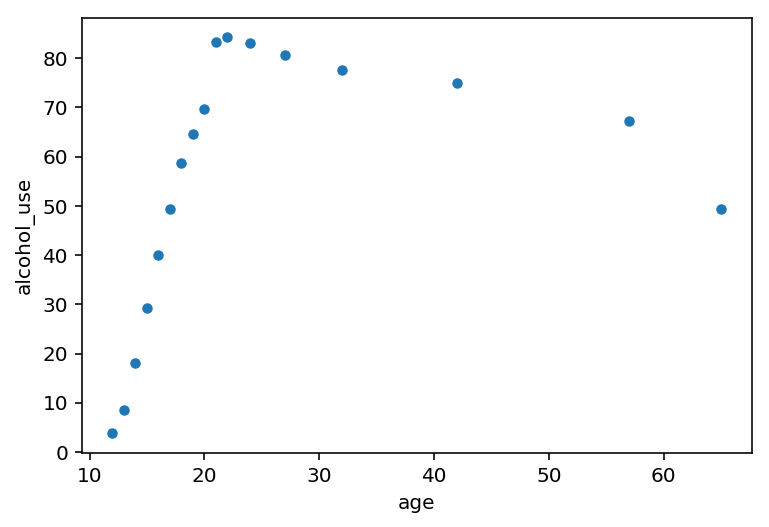

In [85]:
#visualising for relation of age and alcohol use
sns.scatterplot(drug_data.age, drug_data.alcohol_use)

In [86]:
sns.pairplot(drug_data)

In [87]:
#Pearson correlation matrix to check relation of all variables:
drug_data.corr()

age         n  alcohol_use  alcohol_frequency  \
age                      1.000000  0.293039     0.361413           0.636576   
n                        0.293039  1.000000     0.310512           0.313431   
alcohol_use              0.361413  0.310512     1.000000           0.897889   
alcohol_frequency        0.636576  0.313431     0.897889           1.000000   
marijuana_use           -0.383097 -0.169007     0.594165           0.260219   
marijuana_frequency      0.307854  0.135597     0.920425           0.818769   
cocaine_use             -0.192552 -0.021565     0.773458           0.577601   
cocaine_frequency        0.495858  0.388318     0.260301           0.317172   
crack_use                0.144131  0.281797     0.877378           0.785050   
crack_frequency          0.539318  0.574629     0.337802           0.364267   
heroin_use              -0.208148  0.007798     0.677614           0.546194   
heroin_frequency         0.417639  0.617432     0.396779           0.432405   
hallucinogen_use        -0.419643 -0.295302     0.463702           0.182184   
hallucinogen_frequency   0.143281  0.008743    -0.346643          -0.174622   
inhalant_use            -0.799781 -0.368395    -0.648248          -0.864153   
inhalant_frequency      -0.054093  0.227391    -0.511951          -0.351677   
pain_releiver_use       -0.443828 -0.083587     0.617523           0.280704   
pain_releiver_frequency  0.156421 -0.112076    -0.263721           0.007087   
oxycontin_use           -0.393424 -0.166039     0.589219           0.251554   
oxycontin_frequency     -0.210308  0.021226    -0.033615           0.049388   
tranquilizer_use        -0.259527 -0.071086     0.735785           0.448543   
tranquilizer_frequency  -0.311577 -0.102301    -0.550501          -0.415026   
stimulant_use           -0.411138 -0.201621     0.582241           0.291766   
stimulant_frequency      0.704981 -0.114792    -0.028115           0.260304   
meth_use                -0.274682 -0.063571     0.682531           0.425153   
meth_frequency           0.101356  0.510735     0.376863           0.252246   
sedative_use            -0.363820 -0.119997     0.318268           0.029867   
sedative_frequency       0.443721  0.256701     0.091251           0.201423   

                         marijuana_use  marijuana_frequency  cocaine_use  \
age                          -0.383097             0.307854    -0.192552   
n                            -0.169007             0.135597    -0.021565   
alcohol_use                   0.594165             0.920425     0.773458   
alcohol_frequency             0.260219             0.818769     0.577601   
marijuana_use                 1.000000             0.615610     0.883789   
marijuana_frequency           0.615610             1.000000     0.742598   
cocaine_use                   0.883789             0.742598     1.000000   
cocaine_frequency            -0.154879             0.265193    -0.077848   
crack_use                     0.620670             0.892077     0.835727   
crack_frequency              -0.143323             0.273167    -0.076876   
heroin_use                    0.711613             0.631789     0.899944   
heroin_frequency              0.041377             0.346001     0.128866   
hallucinogen_use              0.959353             0.528733     0.855668   
hallucinogen_frequency       -0.478286            -0.380430    -0.368402   
inhalant_use                  0.127336            -0.577792    -0.214609   
inhalant_frequency           -0.588462            -0.537857    -0.483785   
pain_releiver_use             0.966226             0.612254     0.906638   
pain_releiver_frequency      -0.506892            -0.285292    -0.273908   
oxycontin_use                 0.971733             0.609618     0.865626   
oxycontin_frequency          -0.180840             0.066200     0.017269   
tranquilizer_use              0.935199             0.768339     0.920430   
tranquilizer_frequency       -0.401769            -0.591449    -0.

### Visualising the relationship of variables with age & distribution of all the variables separately:

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


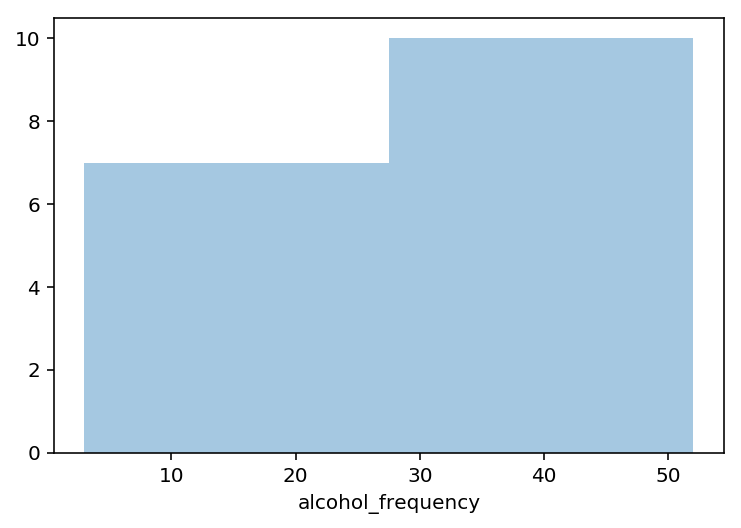

In [92]:
sns.distplot(drug_data['alcohol_frequency'], kde = False)

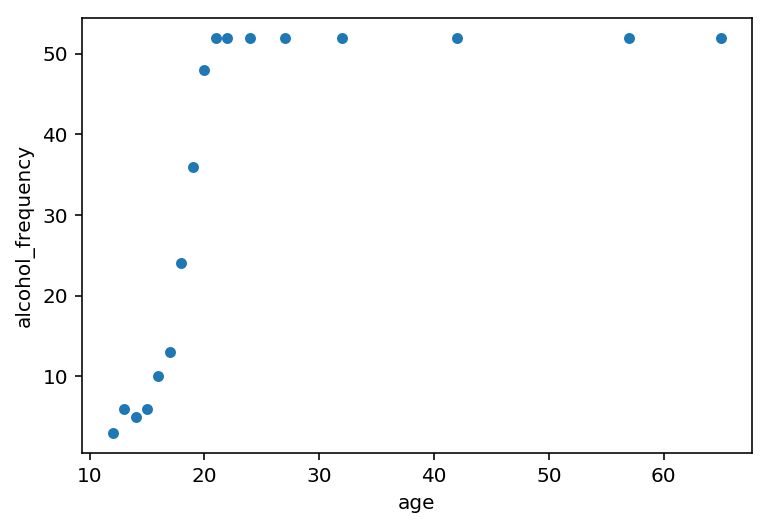

In [93]:
drug_data.plot(kind = 'scatter', x = 'age', y ='alcohol_frequency')

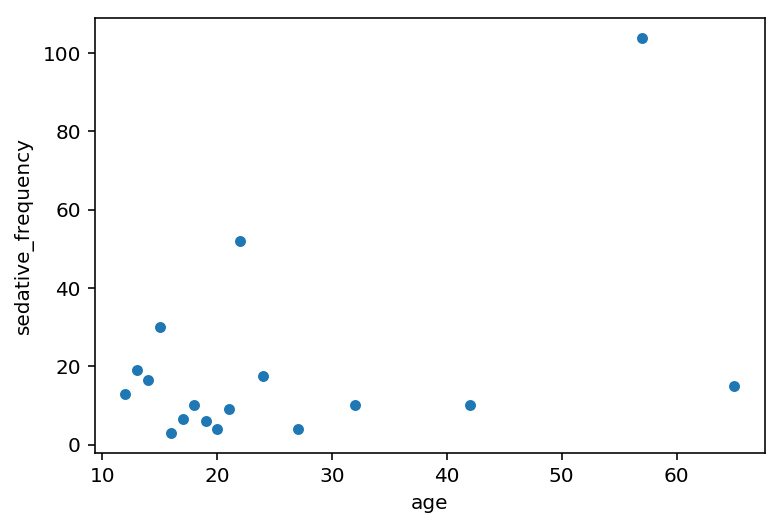

In [94]:
drug_data.plot(kind = 'scatter', x = 'age', y ='sedative_frequency')

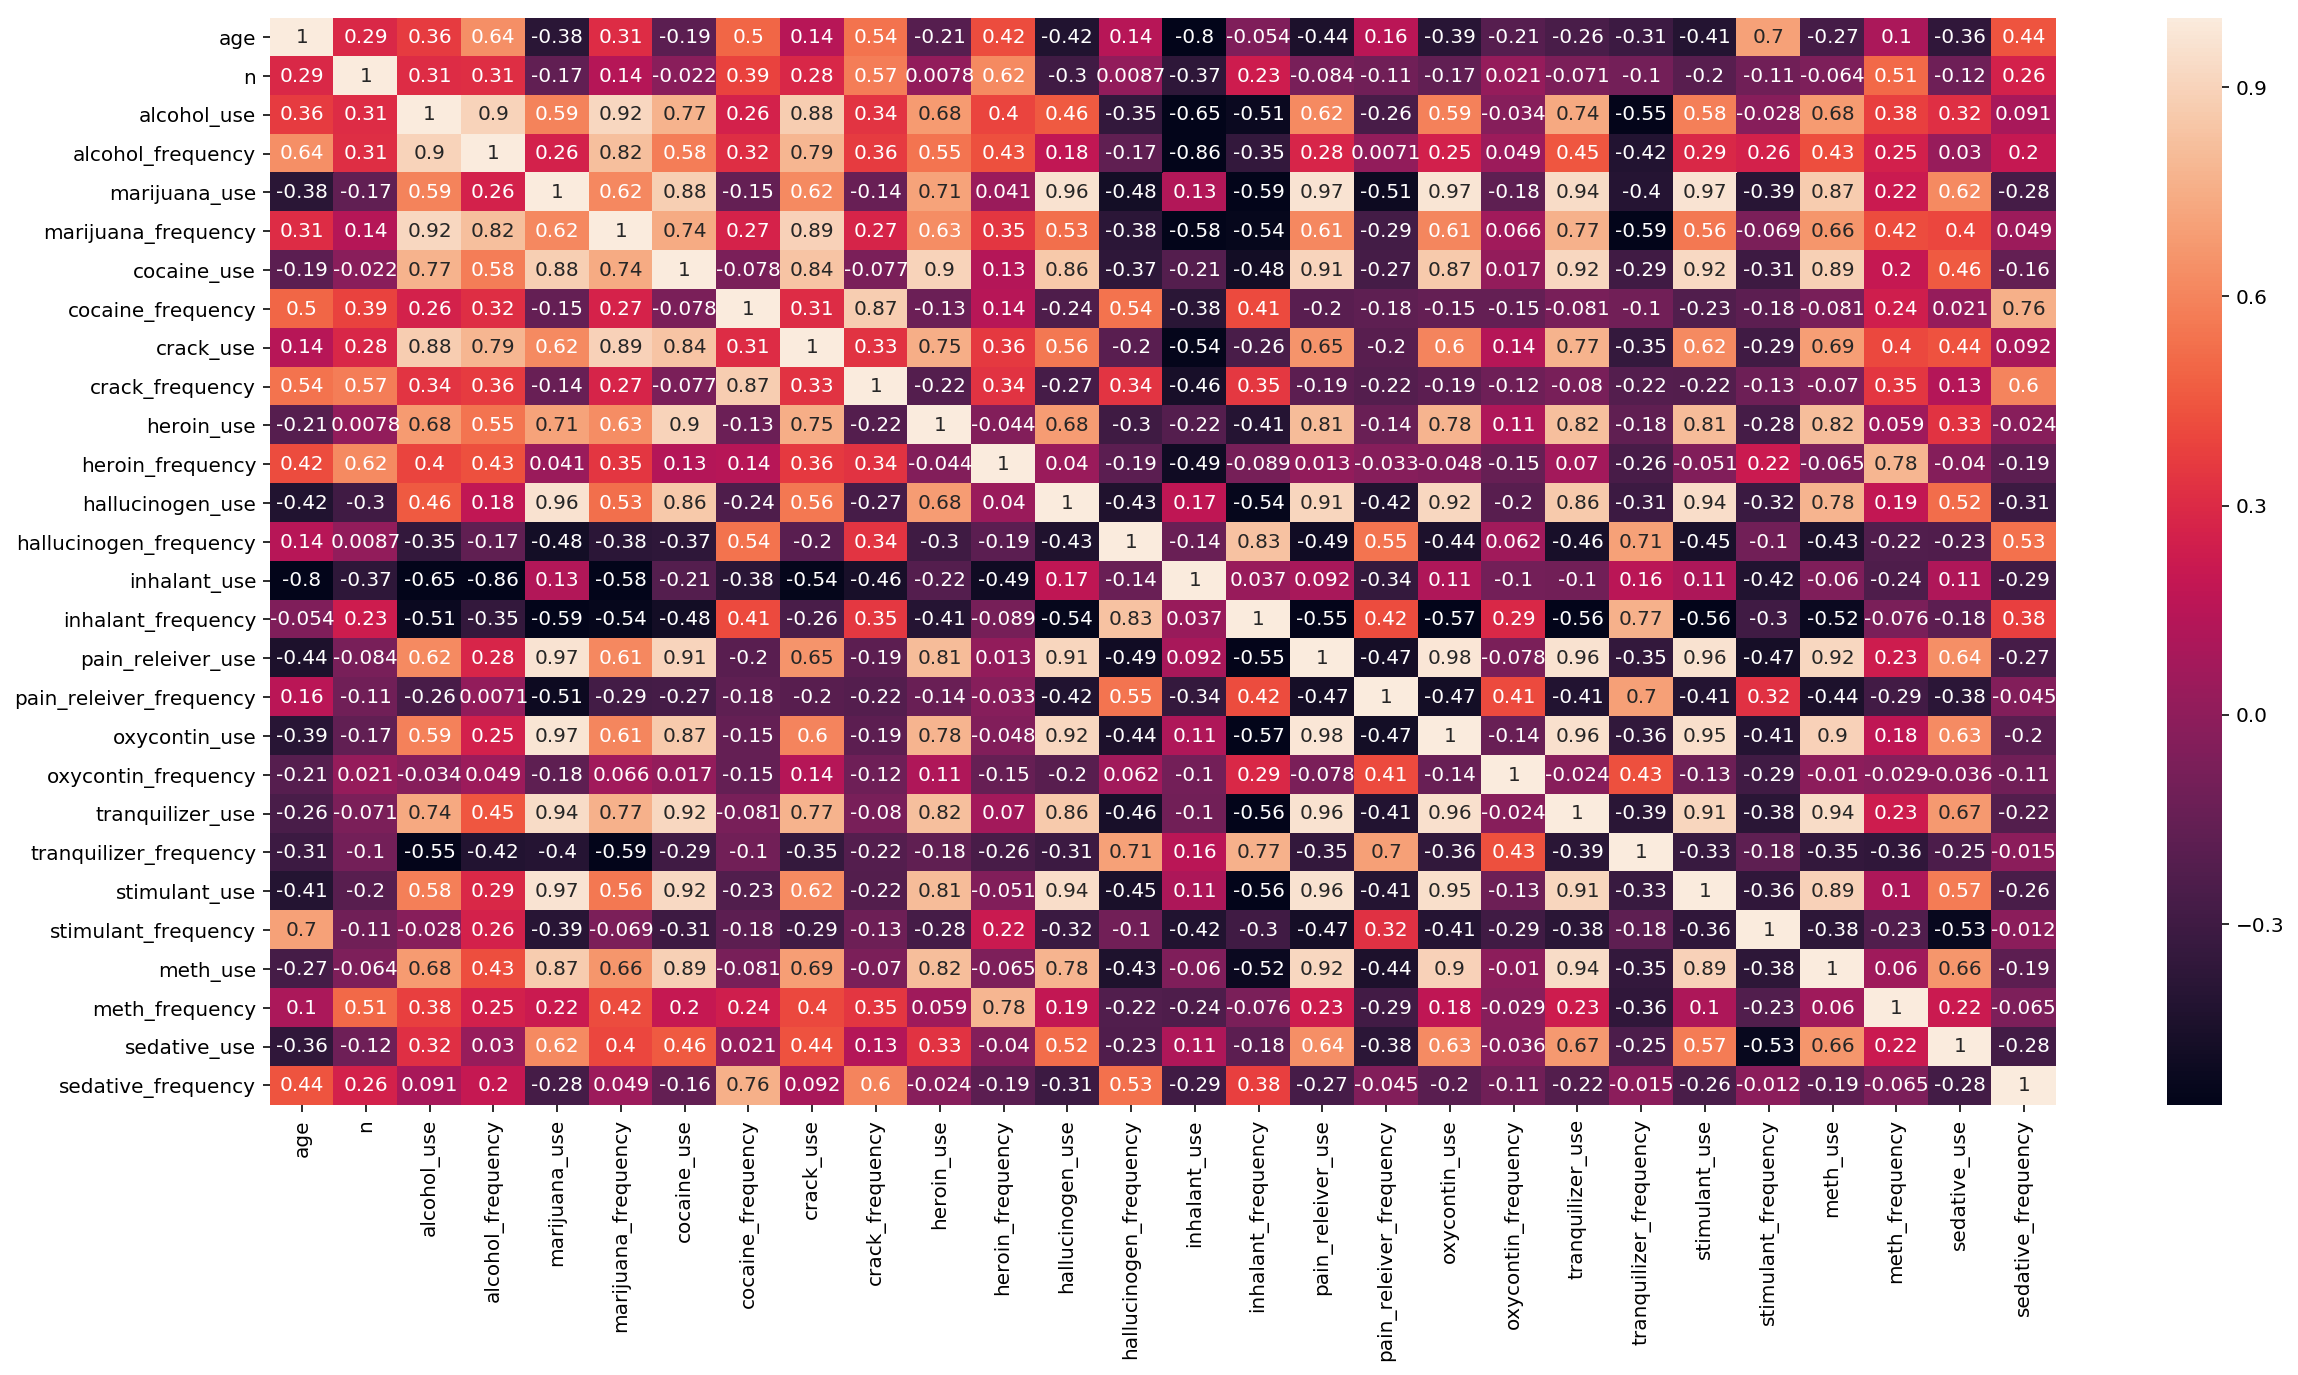

In [95]:
#Visualisation of correlation matrix of all variables:
plt.figure(figsize = (20,10))
sns.heatmap(drug_data.corr(), robust = True, annot = True)

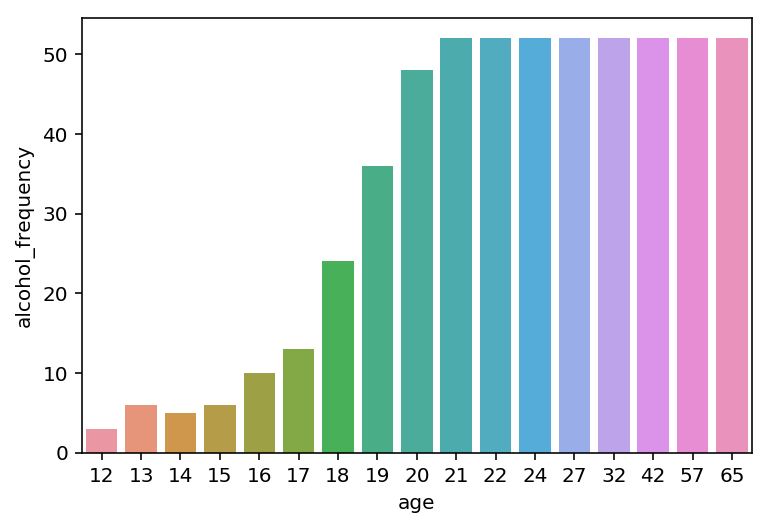

In [96]:
# Barplot of age and alcohol frequency
sns.barplot(drug_data.age, drug_data.alcohol_frequency)


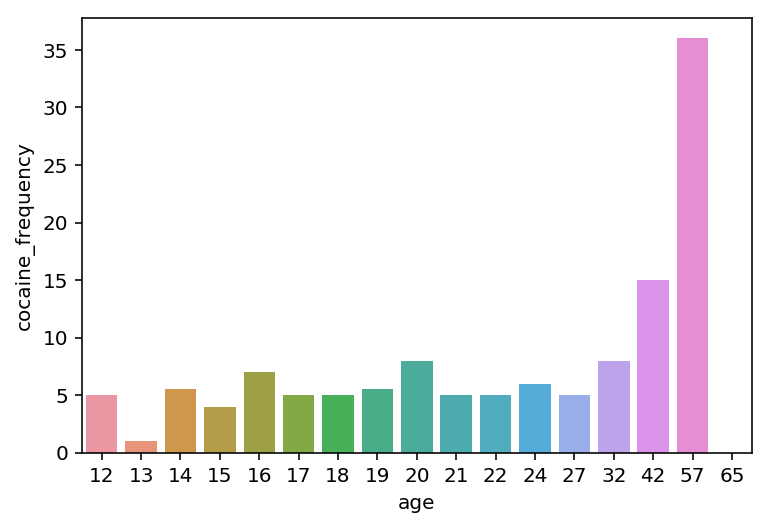

In [97]:
sns.barplot(drug_data.age, drug_data.cocaine_frequency)

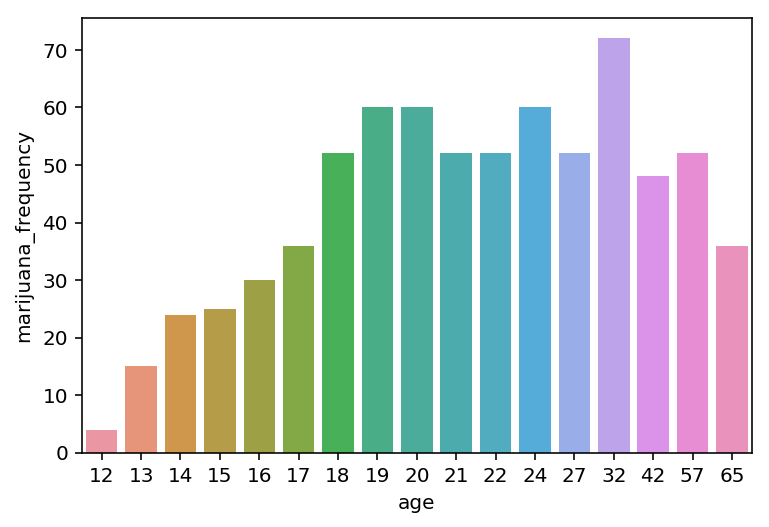

In [98]:
sns.barplot(drug_data.age, drug_data.marijuana_frequency)

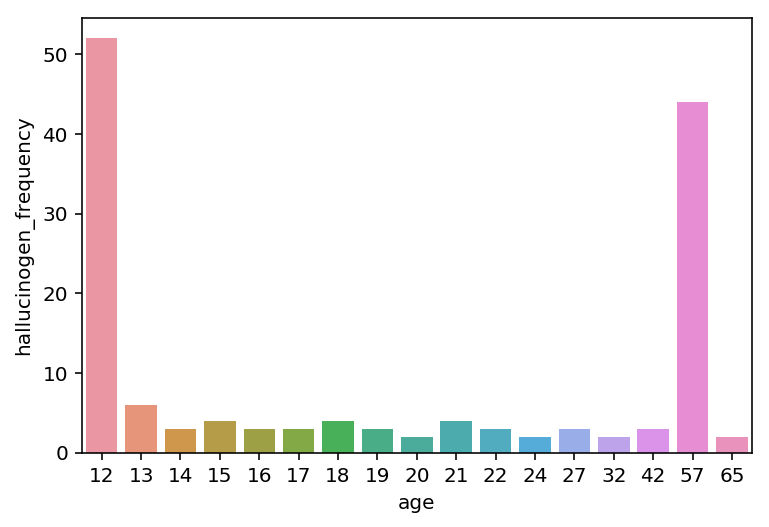

In [99]:
sns.barplot(drug_data.age, drug_data.hallucinogen_frequency)

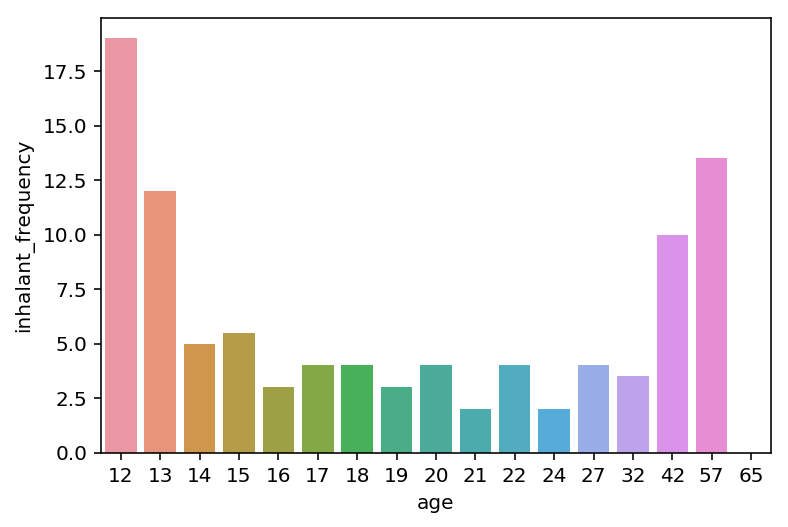

In [100]:
sns.barplot(drug_data.age, drug_data.inhalant_frequency)

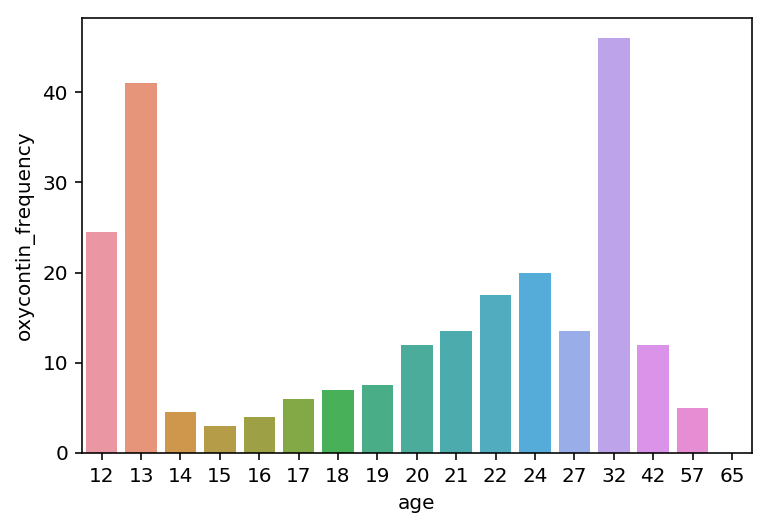

In [364]:
sns.barplot(drug_data.age, drug_data.oxycontin_frequency)

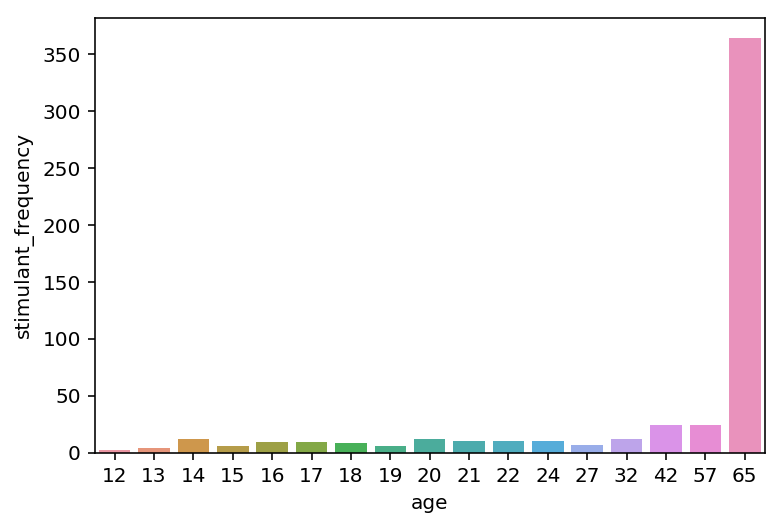

In [365]:
sns.barplot(drug_data.age, drug_data.stimulant_frequency)

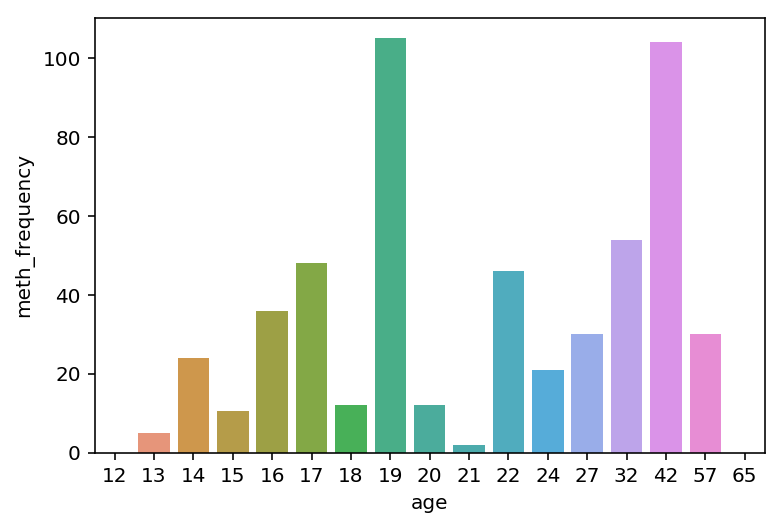

In [102]:
sns.barplot(drug_data.age, drug_data.meth_frequency)

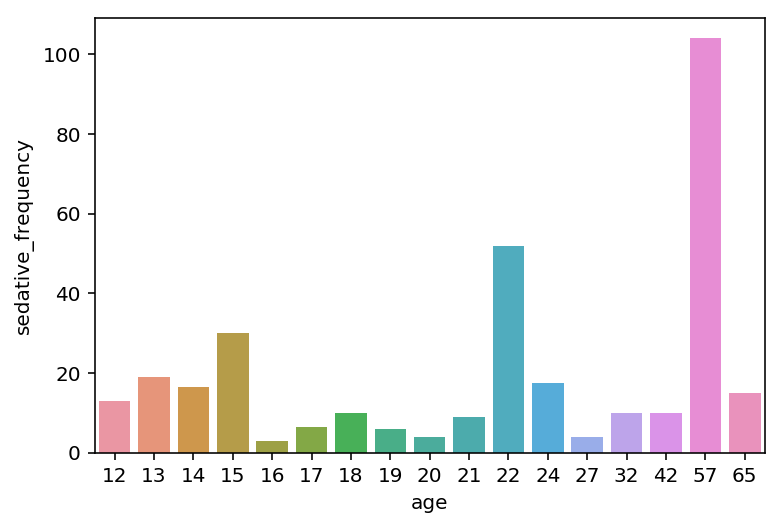

In [103]:
sns.barplot(drug_data.age, drug_data.sedative_frequency)

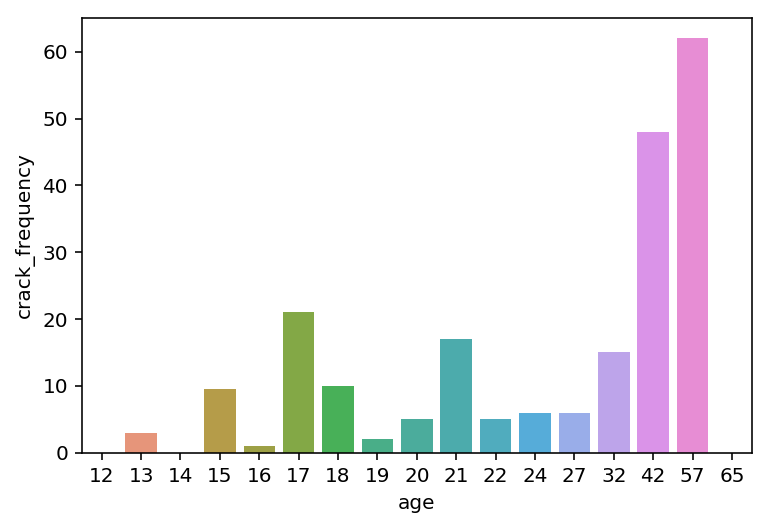

In [104]:
sns.barplot(drug_data.age, drug_data.crack_frequency)

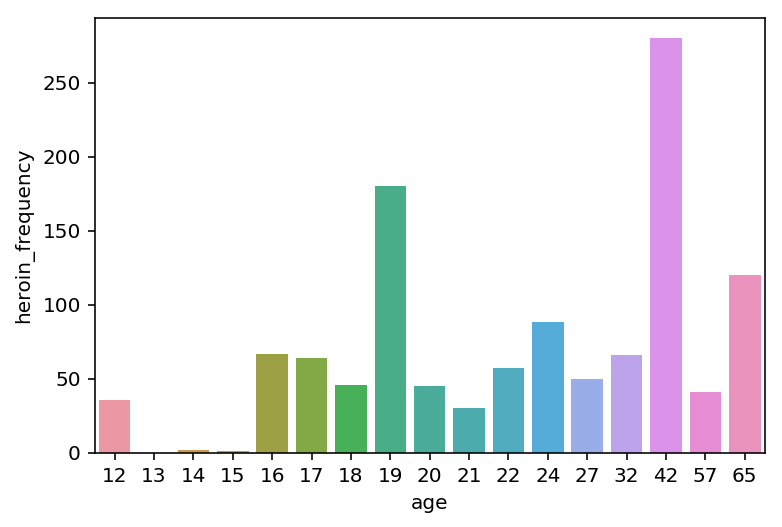

In [102]:
sns.barplot(drug_data.age, drug_data.heroin_frequency)

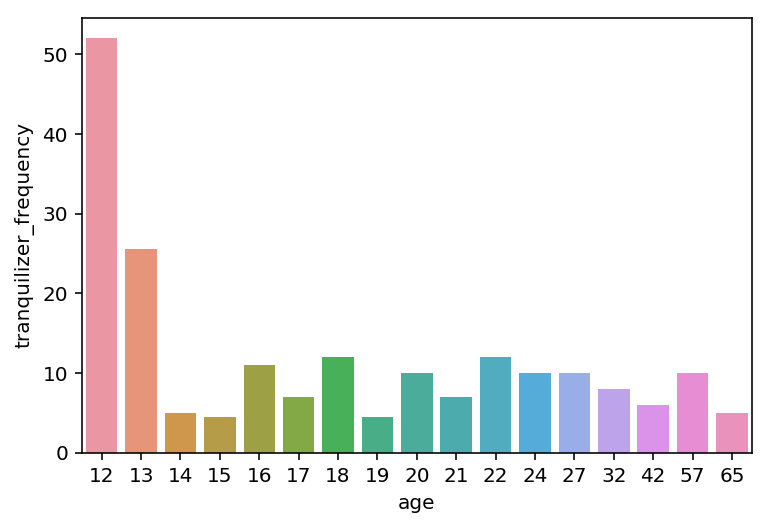

In [368]:
sns.barplot(drug_data.age, drug_data.tranquilizer_frequency)

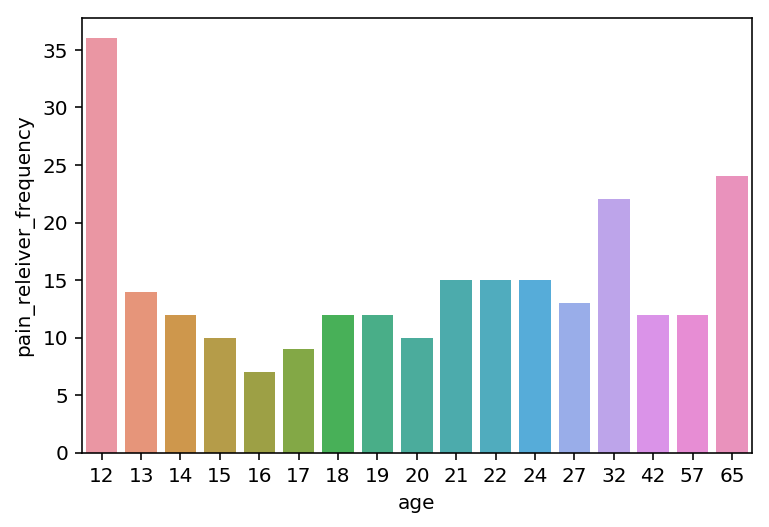

In [104]:
sns.barplot(drug_data.age, drug_data.pain_releiver_frequency)

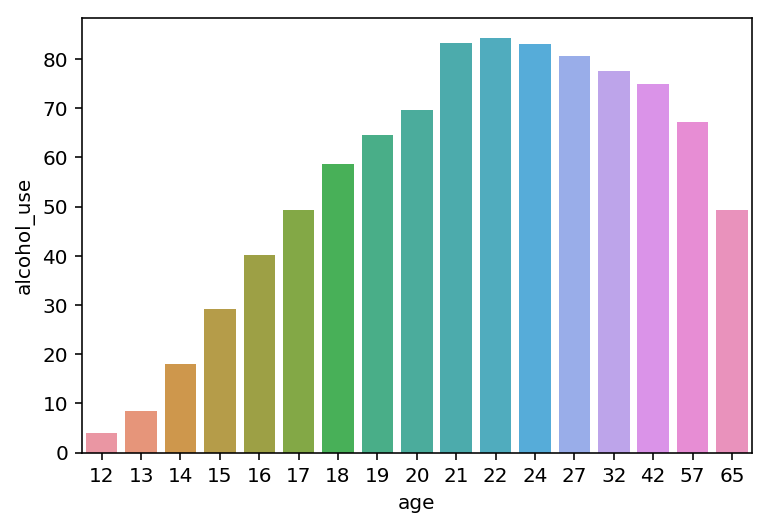

In [369]:
sns.barplot(drug_data.age, drug_data.alcohol_use)

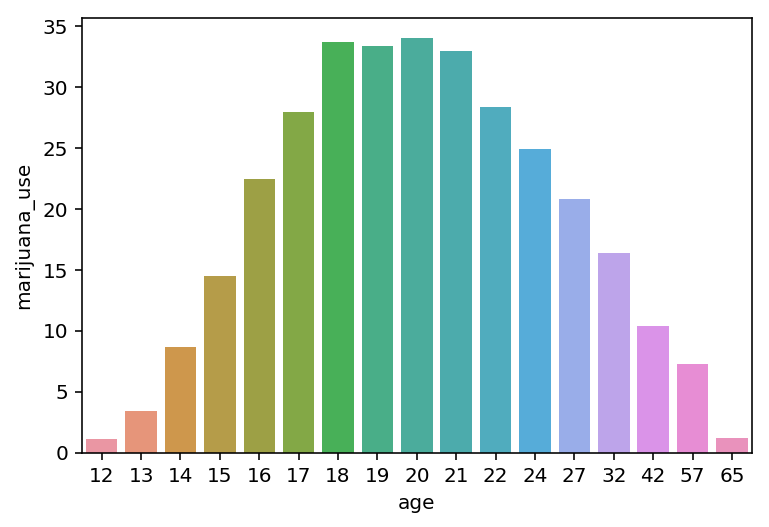

In [370]:
sns.barplot(drug_data.age, drug_data.marijuana_use)

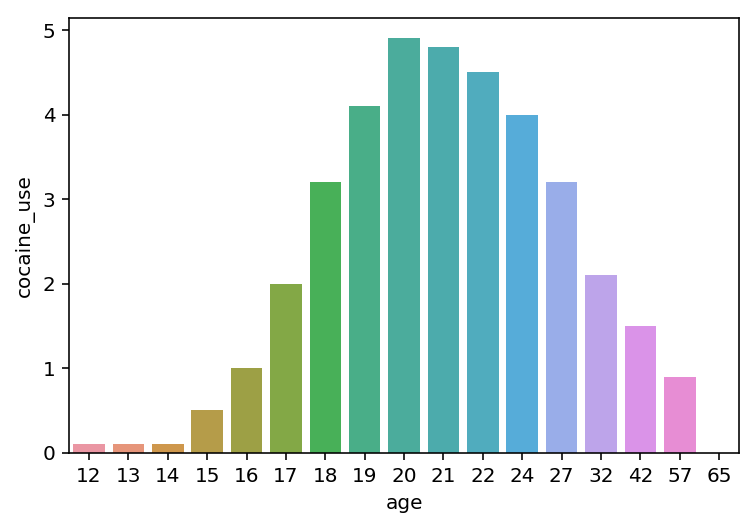

In [371]:
sns.barplot(drug_data.age, drug_data.cocaine_use)

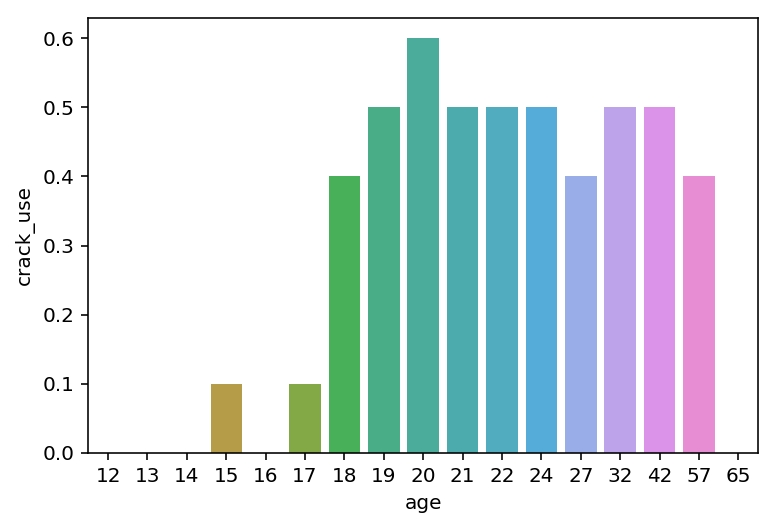

In [134]:
sns.barplot(drug_data.age, drug_data.crack_use)

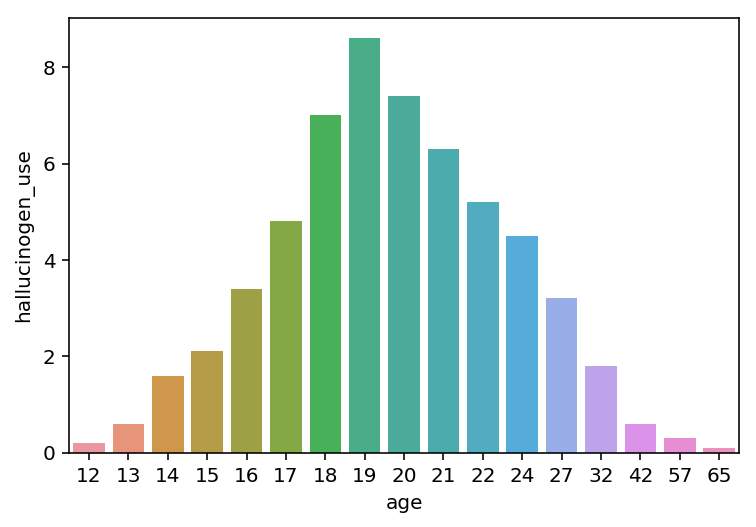

In [112]:
sns.barplot(drug_data.age, drug_data.hallucinogen_use)

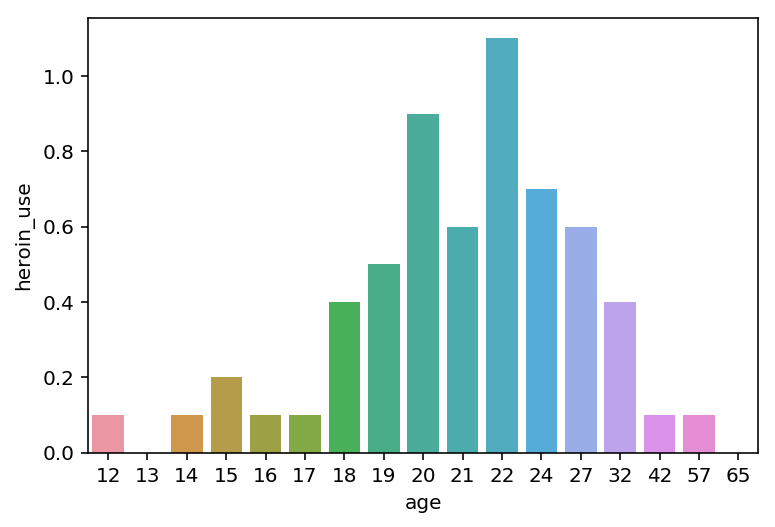

In [113]:
sns.barplot(drug_data.age, drug_data.heroin_use)

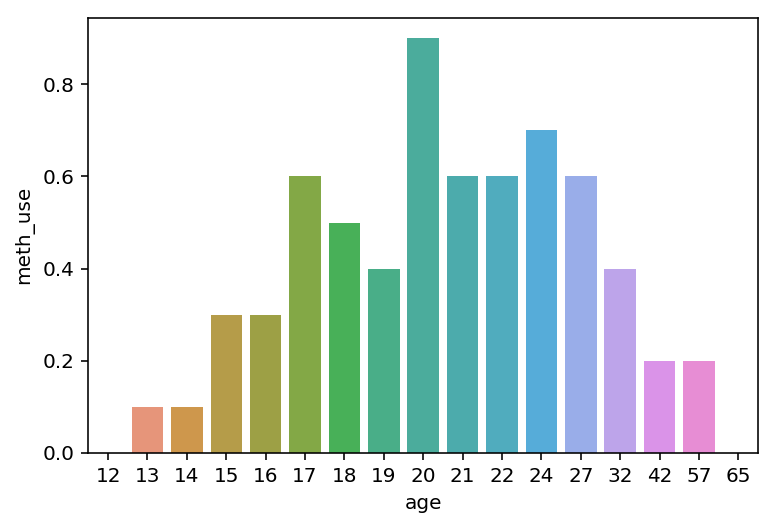

In [114]:
sns.barplot(drug_data.age, drug_data.meth_use)

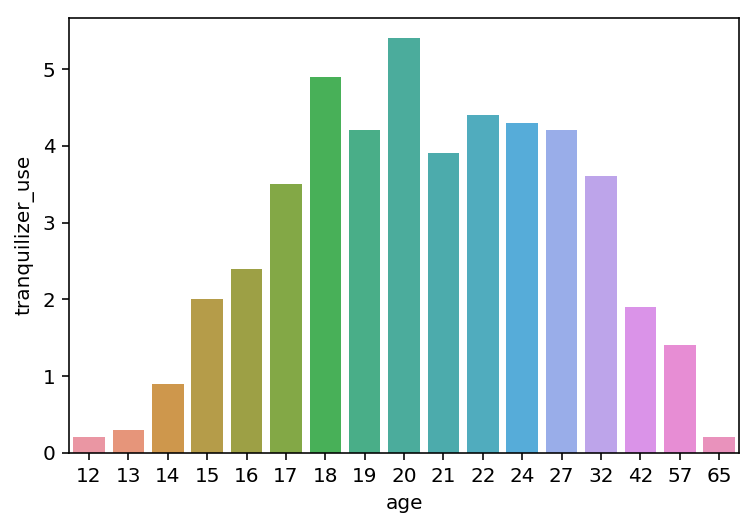

In [115]:
sns.barplot(drug_data.age, drug_data.tranquilizer_use)

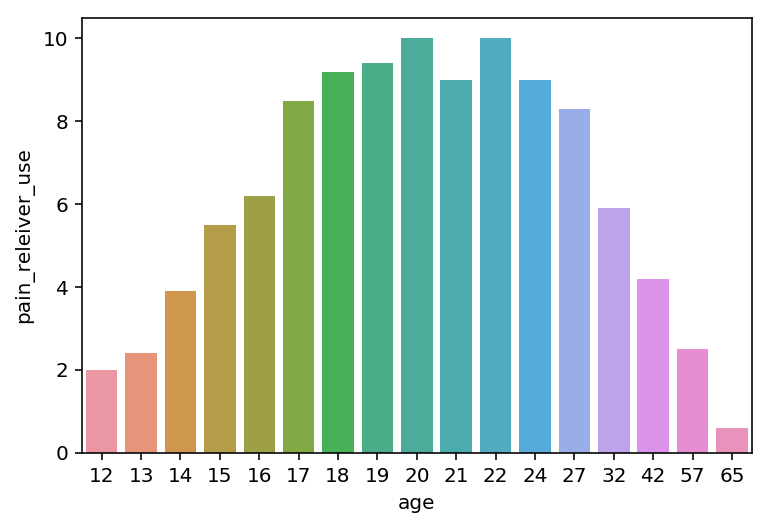

In [116]:
sns.barplot(drug_data.age, drug_data.pain_releiver_use)

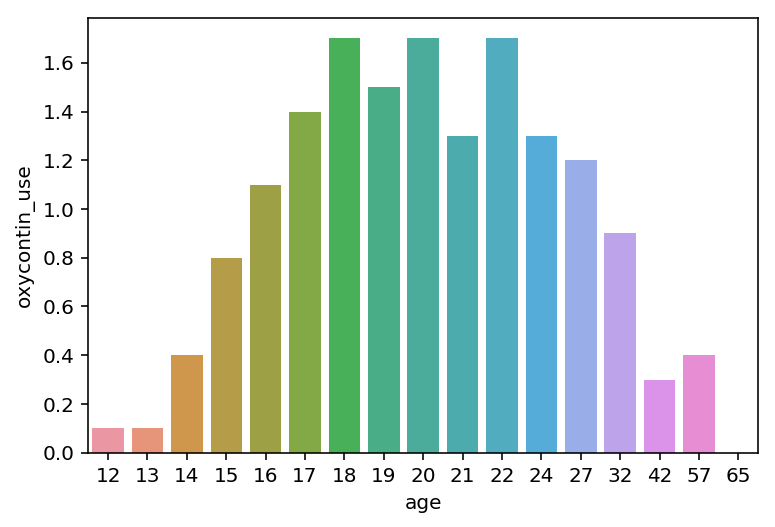

In [120]:
sns.barplot(drug_data.age, drug_data.oxycontin_use)

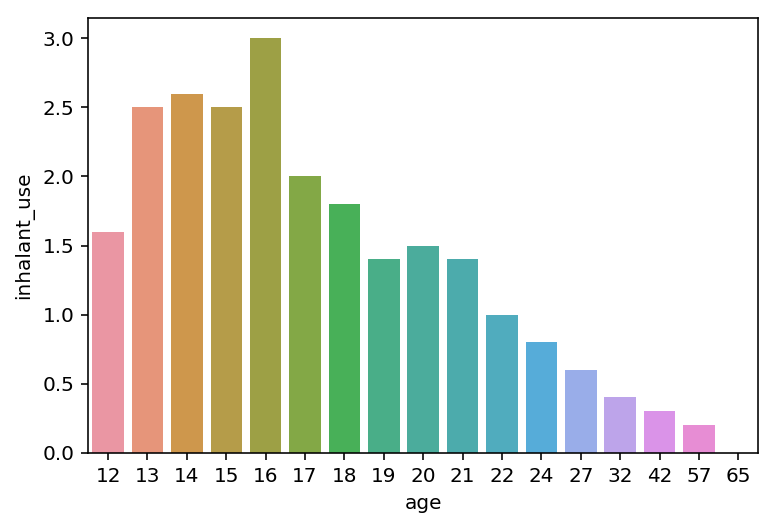

In [119]:
sns.barplot(drug_data.age, drug_data.inhalant_use)

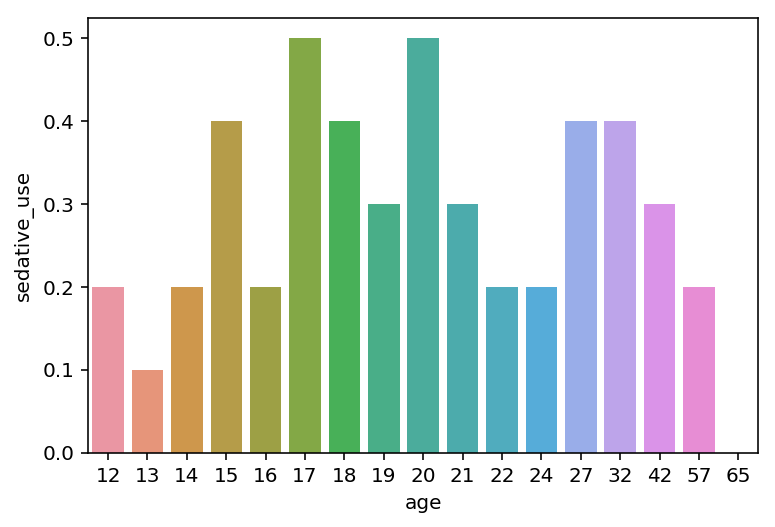

In [118]:
sns.barplot(drug_data.age, drug_data.sedative_use)

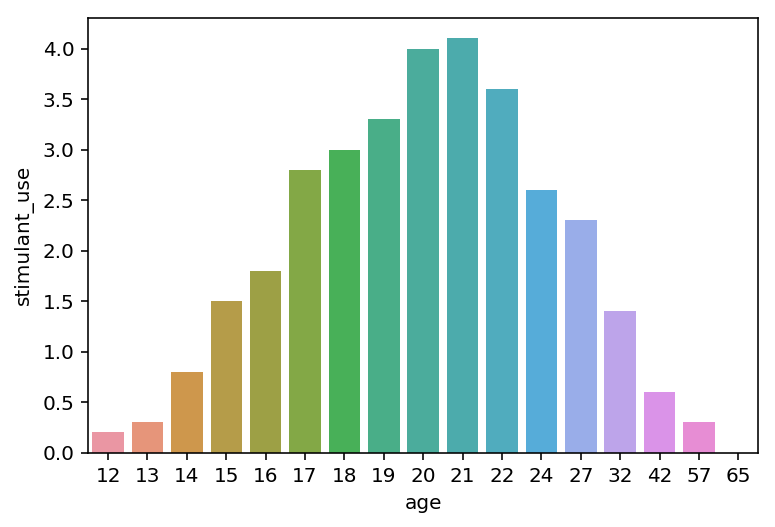

In [117]:
sns.barplot(drug_data.age, drug_data.stimulant_use)

In [105]:
# Wanted to find the type of drug usage which is higher in the age group 16 - 21, as that's the age they enter the university:
# Slicing the data between the age group 16 and 21
drug_data_age = drug_data[(drug_data.age > 16) & (drug_data.age < 22)]

In [107]:
drug_data_age.head()

age     n  alcohol_use  alcohol_frequency  marijuana_use  \
5   17  3038         49.3               13.0           28.0   
6   18  2469         58.7               24.0           33.7   
7   19  2223         64.6               36.0           33.4   
8   20  2271         69.7               48.0           34.0   
9   21  2354         83.2               52.0           33.0   

   marijuana_frequency  cocaine_use  cocaine_frequency  crack_use  \
5                 36.0          2.0                5.0        0.1   
6                 52.0          3.2                5.0        0.4   
7                 60.0          4.1                5.5        0.5   
8                 60.0          4.9                8.0        0.6   
9                 52.0          4.8                5.0        0.5   

   crack_frequency         ...          oxycontin_use  oxycontin_frequency  \
5             21.0         ...                    1.4                  6.0   
6             10.0         ...                    1.7                  7.0   
7              2.0         ...                    1.5                  7.5   
8              5.0         ...                    1.7                 12.0   
9             17.0         ...                    1.3                 13.5   

   tranquilizer_use  tranquilizer_frequency  stimulant_use  \
5               3.5                     7.0            2.8   
6               4.9                    12.0            3.0   
7               4.2                     4.5            3.3   
8               5.4                    10.0            4.0   
9               3.9                     7.0            4.1   

   stimulant_frequency  meth_use  meth_frequency  sedative_use  \
5                  9.0       0.6            48.0           0.5   
6                  8.0       0.5            12.0           0.4   
7                  6.0       0.4           105.0           0.3   
8                 12.0       0.9            12.0           0.5   
9                 10.0       0.6             2.0           0.3   

   sedative_frequency  
5                 6.5  
6                10.0  
7                 6.0  
8                 4.0  
9                 9.0  

[5 rows x 28 columns]

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [108]:
# Code
# From visualisations, it was evident that the type of drugs used frequently or highly popular by this particular range of age group 17-21 
# was alcohol, marijuana, pain reliever, oxycontin & meth.
#Slicing and creating a new dataframe from the particular age group.
drug_data_age_high = drug_data_age[['age', 'n', 'alcohol_use', 'alcohol_frequency', 'marijuana_use', 'marijuana_frequency', 'pain_releiver_use', 'oxycontin_use','meth_use', 'meth_frequency']]



In [121]:
drug_data_age_high

age     n  alcohol_use  alcohol_frequency  marijuana_use  \
5   17  3038         49.3               13.0           28.0   
6   18  2469         58.7               24.0           33.7   
7   19  2223         64.6               36.0           33.4   
8   20  2271         69.7               48.0           34.0   
9   21  2354         83.2               52.0           33.0   

   marijuana_frequency  pain_releiver_use  oxycontin_use  meth_use  \
5                 36.0                8.5            1.4       0.6   
6                 52.0                9.2            1.7       0.5   
7                 60.0                9.4            1.5       0.4   
8                 60.0               10.0            1.7       0.9   
9                 52.0                9.0            1.3       0.6   

   meth_frequency  
5            48.0  
6            12.0  
7           105.0  
8            12.0  
9             2.0

In [380]:
drug_data_age_high.describe().T

count     mean         std     min     25%     50%  \
age                    5.0    19.00    1.581139    17.0    18.0    19.0   
n                      5.0  2471.00  330.411108  2223.0  2271.0  2354.0   
alcohol_use            5.0    65.10   12.645355    49.3    58.7    64.6   
alcohol_frequency      5.0    34.60   16.303374    13.0    24.0    36.0   
marijuana_use          5.0    32.42    2.498399    28.0    33.0    33.4   
marijuana_frequency    5.0    52.00    9.797959    36.0    52.0    52.0   
pain_releiver_use      5.0     9.22    0.549545     8.5     9.0     9.2   
oxycontin_use          5.0     1.52    0.178885     1.3     1.4     1.5   
meth_use               5.0     0.60    0.187083     0.4     0.5     0.6   
meth_frequency         5.0    35.80   42.464102     2.0    12.0    12.0   

                        75%     max  
age                    20.0    21.0  
n                    2469.0  3038.0  
alcohol_use            69.7    83.2  
alcohol_frequency      48.0    52.0  
marijuana_use          33.7    34.0  
marijuana_frequency    60.0    60.0  
pain_releiver_use       9.4    10.0  
oxycontin_use           1.7     1.7  
meth_use                0.6     0.9  
meth_frequency         48.0   105.0

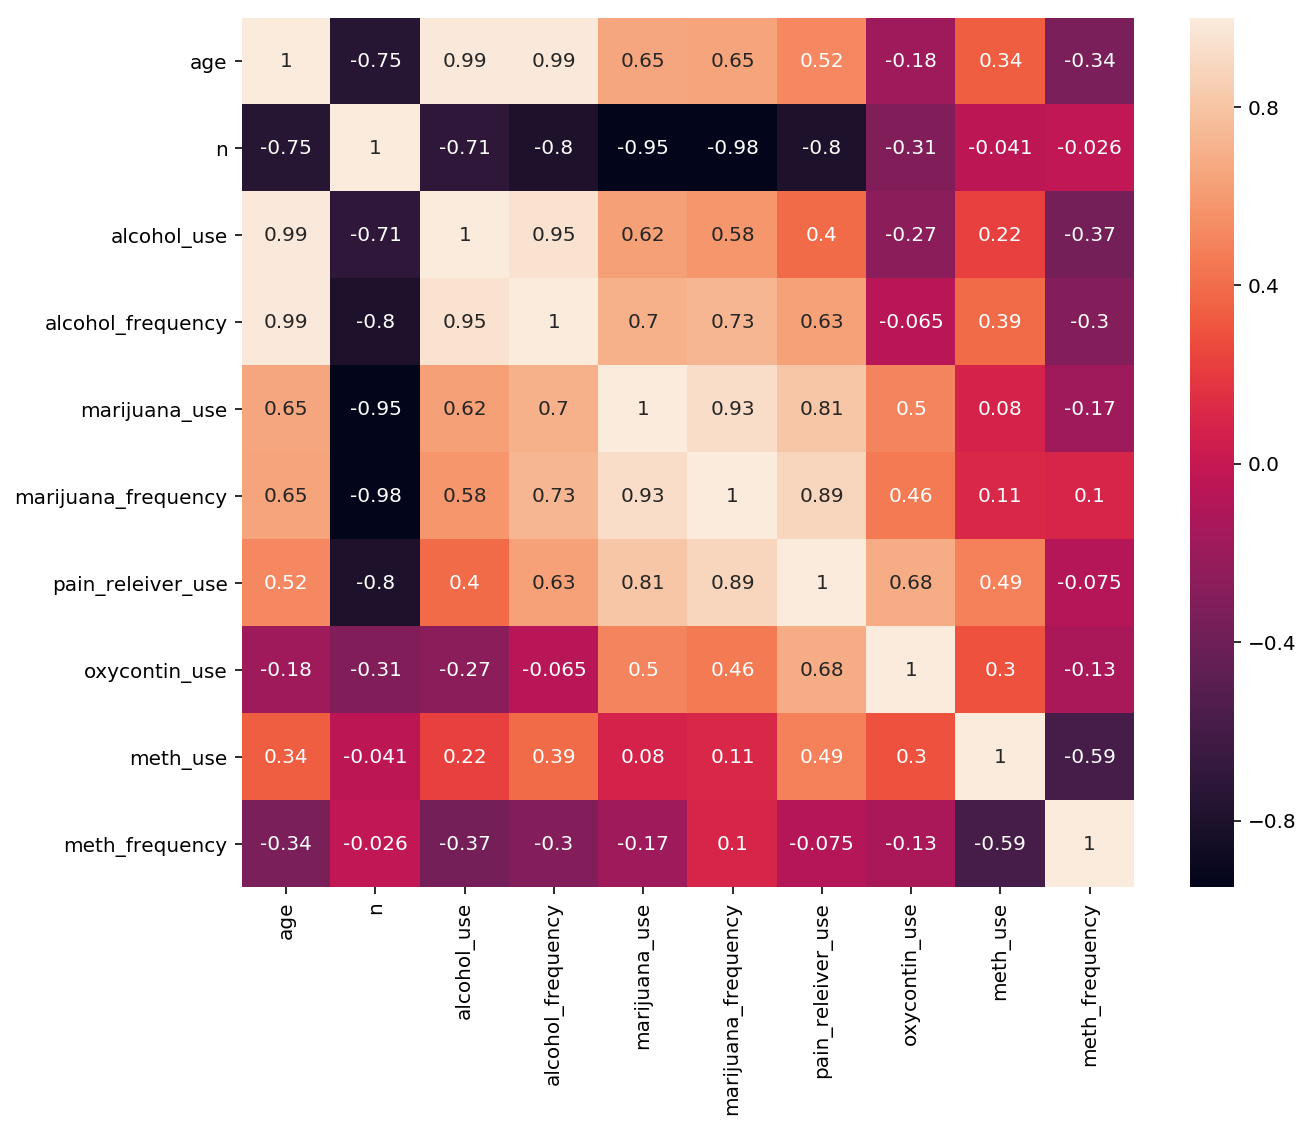

In [109]:
#Checking the correlation of these specific drugs alone with the age:
plt.figure(figsize = (10,8))
sns.heatmap(drug_data_age_high.corr(), robust = True, annot = True)

#### Clearly indicates that alcohol use & marijuana use is high in the age group between 16 and 21. And high corelation between pain releiver use and marijuana use.

#### Alcohol and Marijuana are the drugs highly used by the age group 16 and 21 who enter the university. Those who use marijuana also take more of pain releiver drugs.

In [151]:
# our hypothesis is to say that alcohol & marijuana use is more in age group between 17 and 21 than other drugs.
#Null hypothesis : H0 : Alcohol use and Marijuana use is not significant in age group 17 and 21
# Alternate hypothesis: H1 : Alcohol use is significantly high in age group 17 and 21
# Setting the alpha value to 0.05
alpha = 0.05
t = stats.ttest_ind(drug_data_age_high.alcohol_use, drug_data_age_high.marijuana_use)
if t[1] < 0.05:
    print("We reject our null hypothesis @ this p value " + str(t[1]) + " and conclude that the Alcohol and Marijuana use is significantly high in age group between 17 and 21")
else:
    print("We fail to reject our null hypothesis @ p value " + str(t[0]) + " and cannot conclude that the alcohol and marijuana use is significantly high in 17 and 21")

We reject our null hypothesis @ this p value 0.00047084228398866816 and conclude that the Alcohol and Marijuana use is significantly high in age group between 17 and 21


In [127]:
t

Ttest_indResult(statistic=5.669187202170755, pvalue=0.00047084228398866816)

In [152]:
t1 = stats.ttest_ind(drug_data_age_high.age, drug_data_age_high.marijuana_use)

In [153]:
t1

Ttest_indResult(statistic=-10.149207154097475, pvalue=7.598814985943172e-06)

In [154]:
t2 = stats.ttest_ind(drug_data_age_high.age, drug_data_age_high.alcohol_use)

In [156]:
t2

Ttest_indResult(statistic=-8.08883971375258, pvalue=4.0327659662235964e-05)

**Report**

This exploratory analysis was done specifically on high type of drug used by age group between 17 and 21 who enter university.
Alcohol and Marijuana are the drugs frequently used by this age group. Though other drugs are not frequently used by them, all the other drugs mentioned in the data are used by age groups starting from 12.

In order to avoid the increase in number or the frequency of use of these drugs in future, it is better to address on this drug issue. 

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [161]:
#1. 'Rate' variable in dataset
raw_data1.Rate

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
51    45
Name: Rate, dtype: int64

In [162]:
#statistical description of 'Rate' variable
raw_data1.Rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

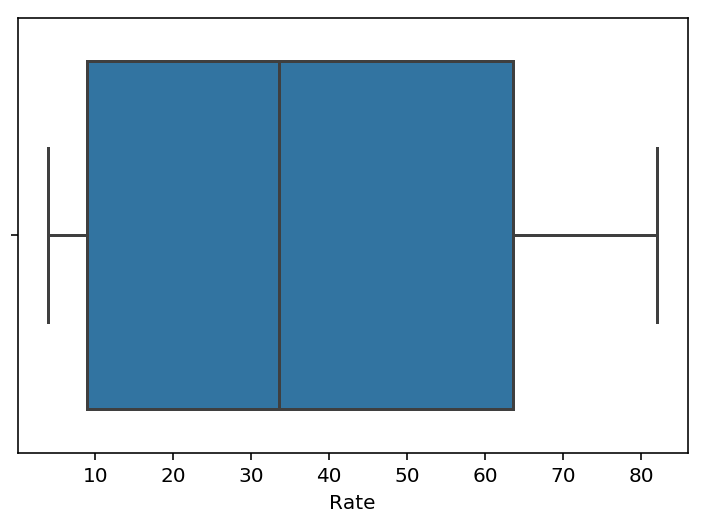

In [163]:
#Checking Outliers in 'rate' variable using boxplot:
sns.boxplot(raw_data1.Rate)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


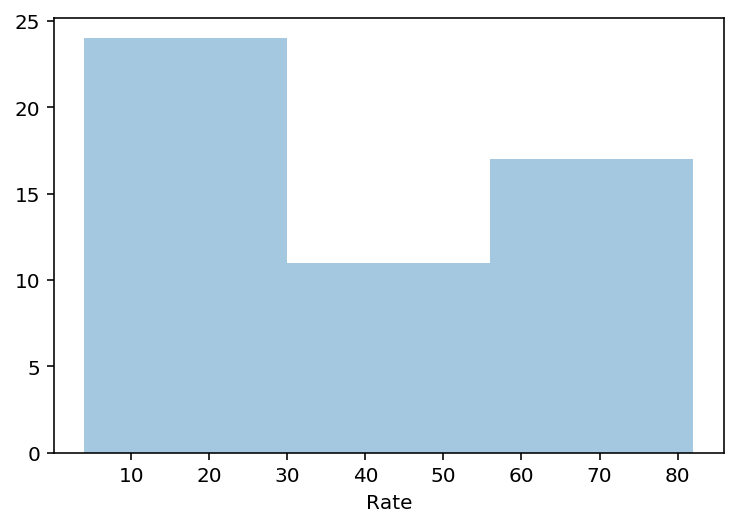

In [164]:
#visualising the distribution of 'Rate' variable:
sns.distplot(raw_data1.Rate, kde = False)

#### 2. Outliers are data values that differ greatly from the majority of a set of data. 
#### These values fall outside of an overall trend that is present in the data.  
#### In the above 'Rate' variable there are no outliers as the values are between 0 -100 only.

#Each of the value in the dataset should not be less than the value of (50th percentile * 1.5) subtracted from value of 25th percentile.
#And, each of the value in the dataset should not be more than the value of(50th percentile * 1.5) added to 75th percentile.

In [165]:
raw_data1.Rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


#### Answer 1: The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the ranked variables. Here, the variables are ranked first whereas in pearson correlation, the relationship is calculated on the original value.

#### Answer 2: Firstly, the individual variables are ranked and their differences are squared. The sum of the squared differences of the ranks are substituted in a formula which gives monotonous relationship with two continuous variable.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [166]:
#ranking the Rate column before calculating percentile
raw_data1['rate_rank'] = raw_data1.Rate.rank()

In [169]:
#1. calculating percentile for each value in variable 'Rate':
raw_data1['rate_percentile'] = round((raw_data1.rate_rank * 100)/len(raw_data1.Rate))

In [170]:
raw_data1.head()

State  Rate  Verbal  Math  diff_verb_math  rate_rank  rate_percentile
0    CT    82     509   510              -1       52.0            100.0
1    NJ    81     499   513             -14       51.0             98.0
2    MA    79     511   515              -4       50.0             96.0
3    NY    77     495   505             -10       49.0             94.0
4    NH    72     520   516               4       48.0             92.0

In [171]:
#2. Percentile of California is 57%
raw_data1[raw_data1.State == 'CA'].rate_percentile


23    57.0
Name: rate_percentile, dtype: float64

#### 3. Percentile is related to Spearman's correlation because we ranked the variable in ascending order and calculated the percentile which is similar to spearman correlation calculation.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [393]:
#Ans 1: Using percentile like interquartile range, we can detect ouliers.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


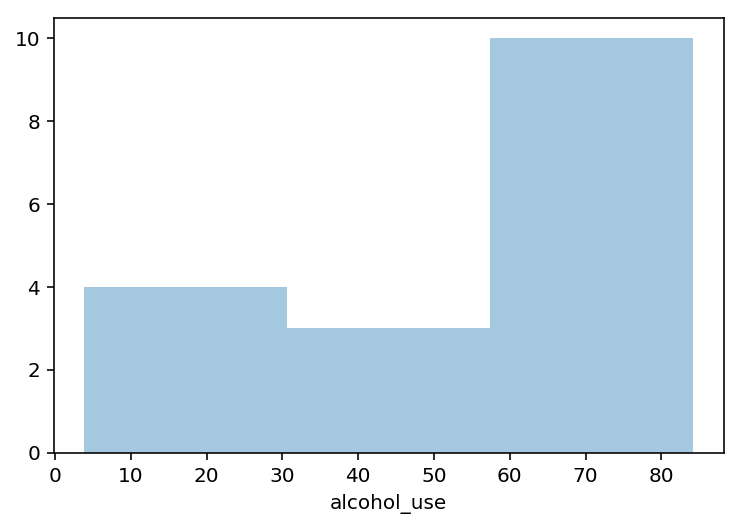

In [173]:
#2. plotting alcohol use in drug dataset
sns.distplot(drug_data.alcohol_use, kde = False)

In [174]:
# Ranking the variable 'alcohol_use':
drug_data['rank_alcohol'] = drug_data.alcohol_use.rank()

In [175]:
# Calculating percentile for each value:
drug_data['percentile_alcohol'] = round((drug_data.rank_alcohol * 100) / len(drug_data.alcohol_use))

In [176]:
# Printing the variable, rank and its percentile:
drug_data[['alcohol_use', 'rank_alcohol', 'percentile_alcohol']].head()

alcohol_use  rank_alcohol  percentile_alcohol
0          3.9           1.0                 6.0
1          8.5           2.0                12.0
2         18.1           3.0                18.0
3         29.2           4.0                24.0
4         40.1           5.0                29.0

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


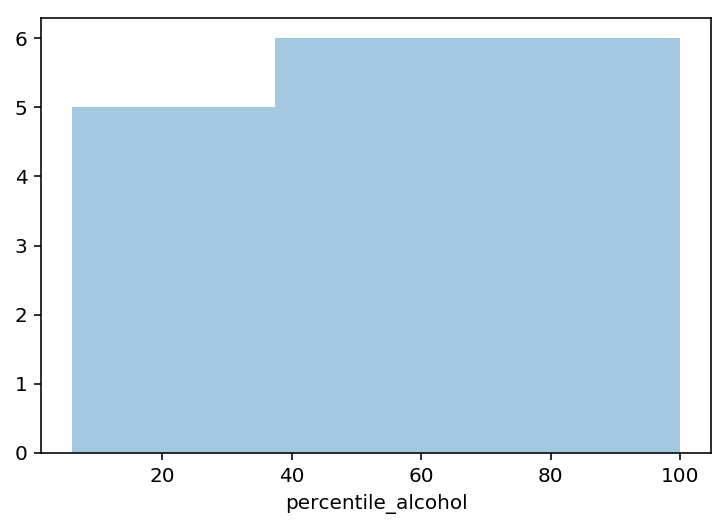

In [180]:
#Ans 3: plotting the percentile scored alcohol use
sns.distplot(drug_data.percentile_alcohol, kde = False)

#Ans 4: Percentile scores gives the clear fall of datapoints and its position.